In [2]:
from __future__ import absolute_import, division, print_function

from os import listdir
import xmltodict
import pandas
from StringIO import StringIO
%matplotlib inline
from tqdm import tqdm
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from praelexis_file_system_provider.data_access_layer import AzureBlobStorageDataAccessLayer
import PyPDF2
import subprocess
import shutil
import os

from PIL import Image

### Test amount value errors

In [4]:
def getValues(fileName):
    f = open(txtNames[i],'r')
    values = []
    line = f.readline()
    while line:

        amountLen = 0
        valueLine = []
        for index,char in enumerate(line):
            if amountLen>0:
                if char == '0' or char == '1' or char == '2' or char == '3' or char == '4' or char == '5'or \
                char == '6' or char == '7' or char == '8' or char == '9' or char == ' ' or char == ',' or \
                char == '.' or char == '-' or char == '+':
                    amountLen+=1
                else:
                    if amountLen>1 and line[index-amountLen:index] != "R ":
                        amount = str(line[index-amountLen:index])
                        amount = amount.replace("R", "")
                        amount = amount.replace(",", "")
                        amount = amount.replace(" ", "")
                        amount = amount.replace(".", "")
                        valueLine.append(amount)
                        if len(valueLine)==2:
                            amountLen = 0
                            break
                    amountLen = 0
                    
            if char == 'R' and amountLen==0 and (len(valueLine)>0 or line[index-1] == ' ' or index==0):
                amountLen = 1
        if amountLen>1 and line[index-amountLen:index] != "R ":
            amount = str(line[index-amountLen:index])
            amount = amount.replace("R", "")
            amount = amount.replace(",", "")
            amount = amount.replace(" ", "")
            amount = amount.replace(".", "")
            valueLine.append(amount)
        if len(valueLine)>0:
            #print(valueLine)
            values.append(valueLine)
        line = f.readline()
    return values
    
def getResult(values):
    possibleAlt = 0.0
    right = 0.0
    total = 0
    skip = 0
    for base in range(1,len(values)):
        i = base# + skip
        try:
            if len(values[i])==2:
                if round(float(values[i][1])-float(values[i][0]),2) == round(float(values[i-1][len(values[i-1])-1]),2):
                    right+=1
                else:
                    skip += 1
                    #print("Wrong. Ans: ", float(values[i][1])," minus ",float(values[i][0])," must equal ",float(values[i-1][len(values[i-1])-1]), ". But true subtraction: ",round(float(values[i][1])-float(values[i][0]),2))
                total += 1
            elif i>0 and len(values[i])==1 and len(values[i-1])!=2:
               # print("Here")
                total += 1
                
        except:
            #print("Not a number.")
            total +=1
    
    return round(right/total,2) if total>0 else 0.0,total

In [5]:
import glob
folderLoc = "./test_files/"
txtNames = glob.glob(folderLoc+"*.txt")
print("Number of textfiles found: ",len(txtNames))
result = np.zeros(len(txtNames))
for i in tqdm(range(len(txtNames))):
    values = getValues(txtNames[i])
    
    res,total = getResult(values)
    result[i] = res
    print("File number: ",str(i+1))
    print("File name: ",txtNames[i])
    print("Number of values tested: ",total)
    print("Accuracy: ", res," out of 1.\n")

  1%|          | 38/4000 [00:00<00:10, 376.27it/s]

Number of textfiles found:  4000
File number:  1
File name:  ./test_files/Example1000.txt
Number of values tested:  208
Accuracy:  0.51  out of 1.

File number:  2
File name:  ./test_files/Example1001.txt
Number of values tested:  84
Accuracy:  0.8  out of 1.

File number:  3
File name:  ./test_files/Example1002.txt
Number of values tested:  84
Accuracy:  0.8  out of 1.

File number:  4
File name:  ./test_files/Example1003.txt
Number of values tested:  180
Accuracy:  0.67  out of 1.

File number:  5
File name:  ./test_files/Example1004.txt
Number of values tested:  180
Accuracy:  0.67  out of 1.

File number:  6
File name:  ./test_files/Example1005.txt
Number of values tested:  61
Accuracy:  0.72  out of 1.

File number:  7
File name:  ./test_files/Example1006.txt
Number of values tested:  61
Accuracy:  0.72  out of 1.

File number:  8
File name:  ./test_files/Example1007.txt
Number of values tested:  98
Accuracy:  0.81  out of 1.

File number:  9
File name:  ./test_files/Example1008.t

  2%|▎         | 100/4000 [00:00<00:12, 320.62it/s]

File number:  74
File name:  ./test_files/Example1067.txt
Number of values tested:  88
Accuracy:  0.72  out of 1.

File number:  75
File name:  ./test_files/Example1068.txt
Number of values tested:  88
Accuracy:  0.72  out of 1.

File number:  76
File name:  ./test_files/Example1069.txt
Number of values tested:  69
Accuracy:  0.78  out of 1.

File number:  77
File name:  ./test_files/Example106.txt
Number of values tested:  84
Accuracy:  0.65  out of 1.

File number:  78
File name:  ./test_files/Example1070.txt
Number of values tested:  69
Accuracy:  0.78  out of 1.

File number:  79
File name:  ./test_files/Example1071.txt
Number of values tested:  67
Accuracy:  0.91  out of 1.

File number:  80
File name:  ./test_files/Example1072.txt
Number of values tested:  67
Accuracy:  0.91  out of 1.

File number:  81
File name:  ./test_files/Example1073.txt
Number of values tested:  90
Accuracy:  0.07  out of 1.

File number:  82
File name:  ./test_files/Example1074.txt
Number of values tested

  4%|▍         | 150/4000 [00:00<00:14, 269.86it/s]

File number:  122
File name:  ./test_files/Example110.txt
Number of values tested:  255
Accuracy:  0.75  out of 1.

File number:  123
File name:  ./test_files/Example1110.txt
Number of values tested:  137
Accuracy:  0.55  out of 1.

File number:  124
File name:  ./test_files/Example1111.txt
Number of values tested:  115
Accuracy:  0.45  out of 1.

File number:  125
File name:  ./test_files/Example1112.txt
Number of values tested:  115
Accuracy:  0.45  out of 1.

File number:  126
File name:  ./test_files/Example1113.txt
Number of values tested:  176
Accuracy:  0.18  out of 1.

File number:  127
File name:  ./test_files/Example1114.txt
Number of values tested:  176
Accuracy:  0.18  out of 1.

File number:  128
File name:  ./test_files/Example1115.txt
Number of values tested:  88
Accuracy:  0.67  out of 1.

File number:  129
File name:  ./test_files/Example1116.txt
Number of values tested:  88
Accuracy:  0.67  out of 1.

File number:  130
File name:  ./test_files/Example1117.txt
Number o

  5%|▌         | 203/4000 [00:00<00:15, 249.82it/s]

File number:  179
File name:  ./test_files/Example1161.txt
Number of values tested:  229
Accuracy:  0.09  out of 1.

File number:  180
File name:  ./test_files/Example1162.txt
Number of values tested:  229
Accuracy:  0.09  out of 1.

File number:  181
File name:  ./test_files/Example1163.txt
Number of values tested:  37
Accuracy:  0.3  out of 1.

File number:  182
File name:  ./test_files/Example1164.txt
Number of values tested:  37
Accuracy:  0.3  out of 1.

File number:  183
File name:  ./test_files/Example1165.txt
Number of values tested:  145
Accuracy:  0.92  out of 1.

File number:  184
File name:  ./test_files/Example1166.txt
Number of values tested:  145
Accuracy:  0.92  out of 1.

File number:  185
File name:  ./test_files/Example1167.txt
Number of values tested:  121
Accuracy:  0.82  out of 1.

File number:  186
File name:  ./test_files/Example1168.txt
Number of values tested:  121
Accuracy:  0.82  out of 1.

File number:  187
File name:  ./test_files/Example1169.txt
Number of

  6%|▌         | 247/4000 [00:00<00:17, 210.23it/s]

File number:  218
File name:  ./test_files/Example1197.txt
Number of values tested:  75
Accuracy:  0.81  out of 1.

File number:  219
File name:  ./test_files/Example1198.txt
Number of values tested:  75
Accuracy:  0.81  out of 1.

File number:  220
File name:  ./test_files/Example1199.txt
Number of values tested:  152
Accuracy:  0.5  out of 1.

File number:  221
File name:  ./test_files/Example119.txt
Number of values tested:  168
Accuracy:  0.46  out of 1.

File number:  222
File name:  ./test_files/Example11.txt
Number of values tested:  318
Accuracy:  0.11  out of 1.

File number:  223
File name:  ./test_files/Example1200.txt
Number of values tested:  152
Accuracy:  0.5  out of 1.

File number:  224
File name:  ./test_files/Example1201.txt
Number of values tested:  126
Accuracy:  0.03  out of 1.

File number:  225
File name:  ./test_files/Example1202.txt
Number of values tested:  126
Accuracy:  0.03  out of 1.

File number:  226
File name:  ./test_files/Example1203.txt
Number of va

  8%|▊         | 307/4000 [00:01<00:14, 247.16it/s]

File number:  258
File name:  ./test_files/Example1232.txt
Number of values tested:  82
Accuracy:  0.79  out of 1.

File number:  259
File name:  ./test_files/Example1233.txt
Number of values tested:  101
Accuracy:  0.34  out of 1.

File number:  260
File name:  ./test_files/Example1234.txt
Number of values tested:  101
Accuracy:  0.34  out of 1.

File number:  261
File name:  ./test_files/Example1235.txt
Number of values tested:  202
Accuracy:  0.1  out of 1.

File number:  262
File name:  ./test_files/Example1236.txt
Number of values tested:  202
Accuracy:  0.1  out of 1.

File number:  263
File name:  ./test_files/Example1237.txt
Number of values tested:  68
Accuracy:  0.04  out of 1.

File number:  264
File name:  ./test_files/Example1238.txt
Number of values tested:  68
Accuracy:  0.04  out of 1.

File number:  265
File name:  ./test_files/Example1239.txt
Number of values tested:  224
Accuracy:  0.64  out of 1.

File number:  266
File name:  ./test_files/Example123.txt
Number of v

  9%|▉         | 367/4000 [00:01<00:15, 237.33it/s]

File number:  314
File name:  ./test_files/Example1283.txt
Number of values tested:  120
Accuracy:  0.46  out of 1.

File number:  315
File name:  ./test_files/Example1284.txt
Number of values tested:  120
Accuracy:  0.46  out of 1.

File number:  316
File name:  ./test_files/Example1285.txt
Number of values tested:  216
Accuracy:  0.41  out of 1.

File number:  317
File name:  ./test_files/Example1286.txt
Number of values tested:  216
Accuracy:  0.41  out of 1.

File number:  318
File name:  ./test_files/Example1287.txt
Number of values tested:  71
Accuracy:  0.89  out of 1.

File number:  319
File name:  ./test_files/Example1288.txt
Number of values tested:  71
Accuracy:  0.89  out of 1.

File number:  320
File name:  ./test_files/Example1289.txt
Number of values tested:  204
Accuracy:  0.65  out of 1.

File number:  321
File name:  ./test_files/Example128.txt
Number of values tested:  35
Accuracy:  0.06  out of 1.

File number:  322
File name:  ./test_files/Example1290.txt
Number of

 11%|█         | 426/4000 [00:01<00:13, 261.34it/s]

File number:  369
File name:  ./test_files/Example1332.txt
Number of values tested:  30
Accuracy:  0.17  out of 1.

File number:  370
File name:  ./test_files/Example1333.txt
Number of values tested:  202
Accuracy:  0.93  out of 1.

File number:  371
File name:  ./test_files/Example1334.txt
Number of values tested:  202
Accuracy:  0.93  out of 1.

File number:  372
File name:  ./test_files/Example1335.txt
Number of values tested:  123
Accuracy:  0.3  out of 1.

File number:  373
File name:  ./test_files/Example1336.txt
Number of values tested:  123
Accuracy:  0.3  out of 1.

File number:  374
File name:  ./test_files/Example1337.txt
Number of values tested:  37
Accuracy:  0.14  out of 1.

File number:  375
File name:  ./test_files/Example1338.txt
Number of values tested:  37
Accuracy:  0.14  out of 1.

File number:  376
File name:  ./test_files/Example1339.txt
Number of values tested:  71
Accuracy:  0.72  out of 1.

File number:  377
File name:  ./test_files/Example133.txt
Number of va

 12%|█▏        | 463/4000 [00:01<00:12, 285.44it/s]

File number:  428
File name:  ./test_files/Example1386.txt
Number of values tested:  136
Accuracy:  0.0  out of 1.

File number:  429
File name:  ./test_files/Example1387.txt
Number of values tested:  64
Accuracy:  0.67  out of 1.

File number:  430
File name:  ./test_files/Example1388.txt
Number of values tested:  64
Accuracy:  0.67  out of 1.

File number:  431
File name:  ./test_files/Example1389.txt
Number of values tested:  88
Accuracy:  0.6  out of 1.

File number:  432
File name:  ./test_files/Example138.txt
Number of values tested:  54
Accuracy:  0.89  out of 1.

File number:  433
File name:  ./test_files/Example1390.txt
Number of values tested:  88
Accuracy:  0.6  out of 1.

File number:  434
File name:  ./test_files/Example1391.txt
Number of values tested:  49
Accuracy:  0.04  out of 1.

File number:  435
File name:  ./test_files/Example1392.txt
Number of values tested:  49
Accuracy:  0.04  out of 1.

File number:  436
File name:  ./test_files/Example1393.txt
Number of values

 13%|█▎        | 522/4000 [00:02<00:13, 249.06it/s]

File number:  484
File name:  ./test_files/Example164.txt
Number of values tested:  101
Accuracy:  0.7  out of 1.

File number:  485
File name:  ./test_files/Example165.txt
Number of values tested:  34
Accuracy:  0.03  out of 1.

File number:  486
File name:  ./test_files/Example166.txt
Number of values tested:  34
Accuracy:  0.03  out of 1.

File number:  487
File name:  ./test_files/Example167.txt
Number of values tested:  65
Accuracy:  0.85  out of 1.

File number:  488
File name:  ./test_files/Example168.txt
Number of values tested:  65
Accuracy:  0.85  out of 1.

File number:  489
File name:  ./test_files/Example169.txt
Number of values tested:  177
Accuracy:  0.68  out of 1.

File number:  490
File name:  ./test_files/Example16.txt
Number of values tested:  64
Accuracy:  0.45  out of 1.

File number:  491
File name:  ./test_files/Example170.txt
Number of values tested:  177
Accuracy:  0.68  out of 1.

File number:  492
File name:  ./test_files/Example171.txt
Number of values test

 14%|█▎        | 549/4000 [00:02<00:16, 207.06it/s]

File number:  531
File name:  ./test_files/Example206.txt
Number of values tested:  131
Accuracy:  0.02  out of 1.

File number:  532
File name:  ./test_files/Example207.txt
Number of values tested:  121
Accuracy:  0.72  out of 1.

File number:  533
File name:  ./test_files/Example208.txt
Number of values tested:  121
Accuracy:  0.72  out of 1.

File number:  534
File name:  ./test_files/Example209.txt
Number of values tested:  133
Accuracy:  0.54  out of 1.

File number:  535
File name:  ./test_files/Example20.txt
Number of values tested:  108
Accuracy:  0.04  out of 1.

File number:  536
File name:  ./test_files/Example210.txt
Number of values tested:  133
Accuracy:  0.54  out of 1.

File number:  537
File name:  ./test_files/Example211.txt
Number of values tested:  59
Accuracy:  0.02  out of 1.

File number:  538
File name:  ./test_files/Example212.txt
Number of values tested:  59
Accuracy:  0.02  out of 1.

File number:  539
File name:  ./test_files/Example213.txt
Number of values 

 15%|█▌        | 608/4000 [00:02<00:14, 236.40it/s]

File number:  562
File name:  ./test_files/Example234.txt
Number of values tested:  134
Accuracy:  0.87  out of 1.

File number:  563
File name:  ./test_files/Example235.txt
Number of values tested:  19
Accuracy:  0.79  out of 1.

File number:  564
File name:  ./test_files/Example236.txt
Number of values tested:  19
Accuracy:  0.79  out of 1.

File number:  565
File name:  ./test_files/Example237.txt
Number of values tested:  66
Accuracy:  0.58  out of 1.

File number:  566
File name:  ./test_files/Example238.txt
Number of values tested:  66
Accuracy:  0.58  out of 1.

File number:  567
File name:  ./test_files/Example239.txt
Number of values tested:  90
Accuracy:  0.69  out of 1.

File number:  568
File name:  ./test_files/Example23.txt
Number of values tested:  40
Accuracy:  0.03  out of 1.

File number:  569
File name:  ./test_files/Example240.txt
Number of values tested:  90
Accuracy:  0.69  out of 1.

File number:  570
File name:  ./test_files/Example241.txt
Number of values teste

 17%|█▋        | 678/4000 [00:02<00:11, 282.47it/s]

File number:  641
File name:  ./test_files/Example305.txt
Number of values tested:  211
Accuracy:  0.74  out of 1.

File number:  642
File name:  ./test_files/Example306.txt
Number of values tested:  211
Accuracy:  0.74  out of 1.

File number:  643
File name:  ./test_files/Example307.txt
Number of values tested:  65
Accuracy:  0.0  out of 1.

File number:  644
File name:  ./test_files/Example308.txt
Number of values tested:  65
Accuracy:  0.0  out of 1.

File number:  645
File name:  ./test_files/Example309.txt
Number of values tested:  99
Accuracy:  0.28  out of 1.

File number:  646
File name:  ./test_files/Example30.txt
Number of values tested:  149
Accuracy:  0.68  out of 1.

File number:  647
File name:  ./test_files/Example310.txt
Number of values tested:  99
Accuracy:  0.28  out of 1.

File number:  648
File name:  ./test_files/Example311.txt
Number of values tested:  78
Accuracy:  0.4  out of 1.

File number:  649
File name:  ./test_files/Example312.txt
Number of values tested

 18%|█▊        | 739/4000 [00:02<00:12, 258.69it/s]

File number:  697
File name:  ./test_files/Example356.txt
Number of values tested:  163
Accuracy:  0.85  out of 1.

File number:  698
File name:  ./test_files/Example357.txt
Number of values tested:  163
Accuracy:  0.85  out of 1.

File number:  699
File name:  ./test_files/Example358.txt
Number of values tested:  163
Accuracy:  0.85  out of 1.

File number:  700
File name:  ./test_files/Example359.txt
Number of values tested:  732
Accuracy:  0.09  out of 1.

File number:  701
File name:  ./test_files/Example35.txt
Number of values tested:  31
Accuracy:  0.65  out of 1.

File number:  702
File name:  ./test_files/Example360.txt
Number of values tested:  732
Accuracy:  0.09  out of 1.

File number:  703
File name:  ./test_files/Example361.txt
Number of values tested:  79
Accuracy:  0.81  out of 1.

File number:  704
File name:  ./test_files/Example362.txt
Number of values tested:  79
Accuracy:  0.81  out of 1.

File number:  705
File name:  ./test_files/Example363.txt
Number of values t

 19%|█▉        | 767/4000 [00:03<00:12, 248.98it/s]

File number:  747
File name:  ./test_files/Example400.txt
Number of values tested:  178
Accuracy:  0.83  out of 1.

File number:  748
File name:  ./test_files/Example401.txt
Number of values tested:  85
Accuracy:  0.6  out of 1.

File number:  749
File name:  ./test_files/Example402.txt
Number of values tested:  85
Accuracy:  0.6  out of 1.

File number:  750
File name:  ./test_files/Example403.txt
Number of values tested:  102
Accuracy:  0.85  out of 1.

File number:  751
File name:  ./test_files/Example404.txt
Number of values tested:  102
Accuracy:  0.85  out of 1.

File number:  752
File name:  ./test_files/Example405.txt
Number of values tested:  89
Accuracy:  0.38  out of 1.

File number:  753
File name:  ./test_files/Example406.txt
Number of values tested:  89
Accuracy:  0.38  out of 1.

File number:  754
File name:  ./test_files/Example407.txt
Number of values tested:  37
Accuracy:  0.11  out of 1.

File number:  755
File name:  ./test_files/Example408.txt
Number of values test

 20%|██        | 819/4000 [00:03<00:13, 240.81it/s]

File number:  790
File name:  ./test_files/Example43.txt
Number of values tested:  16
Accuracy:  0.69  out of 1.

File number:  791
File name:  ./test_files/Example440.txt
Number of values tested:  79
Accuracy:  0.8  out of 1.

File number:  792
File name:  ./test_files/Example441.txt
Number of values tested:  103
Accuracy:  0.86  out of 1.

File number:  793
File name:  ./test_files/Example442.txt
Number of values tested:  103
Accuracy:  0.86  out of 1.

File number:  794
File name:  ./test_files/Example443.txt
Number of values tested:  44
Accuracy:  0.2  out of 1.

File number:  795
File name:  ./test_files/Example444.txt
Number of values tested:  44
Accuracy:  0.2  out of 1.

File number:  796
File name:  ./test_files/Example445.txt
Number of values tested:  54
Accuracy:  0.06  out of 1.

File number:  797
File name:  ./test_files/Example446.txt
Number of values tested:  54
Accuracy:  0.06  out of 1.

File number:  798
File name:  ./test_files/Example447.txt
Number of values tested:

 22%|██▏       | 875/4000 [00:03<00:12, 255.12it/s]

File number:  845
File name:  ./test_files/Example48.txt
Number of values tested:  32
Accuracy:  0.13  out of 1.

File number:  846
File name:  ./test_files/Example490.txt
Number of values tested:  80
Accuracy:  0.75  out of 1.

File number:  847
File name:  ./test_files/Example491.txt
Number of values tested:  147
Accuracy:  0.88  out of 1.

File number:  848
File name:  ./test_files/Example492.txt
Number of values tested:  147
Accuracy:  0.88  out of 1.

File number:  849
File name:  ./test_files/Example493.txt
Number of values tested:  337
Accuracy:  0.96  out of 1.

File number:  850
File name:  ./test_files/Example494.txt
Number of values tested:  337
Accuracy:  0.96  out of 1.

File number:  851
File name:  ./test_files/Example495.txt
Number of values tested:  148
Accuracy:  0.76  out of 1.

File number:  852
File name:  ./test_files/Example496.txt
Number of values tested:  148
Accuracy:  0.76  out of 1.

File number:  853
File name:  ./test_files/Example497.txt
Number of values 

 23%|██▎       | 931/4000 [00:03<00:13, 224.80it/s]

File number:  904
File name:  ./test_files/Example542.txt
Number of values tested:  182
Accuracy:  0.58  out of 1.

File number:  905
File name:  ./test_files/Example543.txt
Number of values tested:  45
Accuracy:  0.16  out of 1.

File number:  906
File name:  ./test_files/Example544.txt
Number of values tested:  45
Accuracy:  0.16  out of 1.

File number:  907
File name:  ./test_files/Example545.txt
Number of values tested:  162
Accuracy:  0.84  out of 1.

File number:  908
File name:  ./test_files/Example546.txt
Number of values tested:  162
Accuracy:  0.84  out of 1.

File number:  909
File name:  ./test_files/Example547.txt
Number of values tested:  80
Accuracy:  0.2  out of 1.

File number:  910
File name:  ./test_files/Example548.txt
Number of values tested:  80
Accuracy:  0.2  out of 1.

File number:  911
File name:  ./test_files/Example549.txt
Number of values tested:  135
Accuracy:  0.27  out of 1.

File number:  912
File name:  ./test_files/Example54.txt
Number of values test

 24%|██▍       | 955/4000 [00:03<00:15, 200.32it/s]

File number:  938
File name:  ./test_files/Example573.txt
Number of values tested:  242
Accuracy:  0.83  out of 1.

File number:  939
File name:  ./test_files/Example574.txt
Number of values tested:  242
Accuracy:  0.83  out of 1.

File number:  940
File name:  ./test_files/Example575.txt
Number of values tested:  343
Accuracy:  0.78  out of 1.

File number:  941
File name:  ./test_files/Example576.txt
Number of values tested:  343
Accuracy:  0.78  out of 1.

File number:  942
File name:  ./test_files/Example577.txt
Number of values tested:  204
Accuracy:  0.03  out of 1.

File number:  943
File name:  ./test_files/Example578.txt
Number of values tested:  204
Accuracy:  0.03  out of 1.

File number:  944
File name:  ./test_files/Example579.txt
Number of values tested:  141
Accuracy:  0.01  out of 1.

File number:  945
File name:  ./test_files/Example57.txt
Number of values tested:  121
Accuracy:  0.65  out of 1.

File number:  946
File name:  ./test_files/Example580.txt
Number of value

 25%|██▌       | 1010/4000 [00:04<00:12, 230.51it/s]

 ./test_files/Example608.txt
Number of values tested:  55
Accuracy:  0.58  out of 1.

File number:  978
File name:  ./test_files/Example609.txt
Number of values tested:  61
Accuracy:  0.69  out of 1.

File number:  979
File name:  ./test_files/Example60.txt
Number of values tested:  117
Accuracy:  0.11  out of 1.

File number:  980
File name:  ./test_files/Example610.txt
Number of values tested:  61
Accuracy:  0.69  out of 1.

File number:  981
File name:  ./test_files/Example611.txt
Number of values tested:  63
Accuracy:  0.76  out of 1.

File number:  982
File name:  ./test_files/Example612.txt
Number of values tested:  63
Accuracy:  0.76  out of 1.

File number:  983
File name:  ./test_files/Example613.txt
Number of values tested:  142
Accuracy:  0.51  out of 1.

File number:  984
File name:  ./test_files/Example614.txt
Number of values tested:  142
Accuracy:  0.51  out of 1.

File number:  985
File name:  ./test_files/Example615.txt
Number of values tested:  83
Accuracy:  0.89  out

 27%|██▋       | 1063/4000 [00:04<00:12, 227.52it/s]

File number:  1037
File name:  ./test_files/Example662.txt
Number of values tested:  116
Accuracy:  0.39  out of 1.

File number:  1038
File name:  ./test_files/Example663.txt
Number of values tested:  137
Accuracy:  0.91  out of 1.

File number:  1039
File name:  ./test_files/Example664.txt
Number of values tested:  137
Accuracy:  0.91  out of 1.

File number:  1040
File name:  ./test_files/Example665.txt
Number of values tested:  35
Accuracy:  0.91  out of 1.

File number:  1041
File name:  ./test_files/Example666.txt
Number of values tested:  35
Accuracy:  0.91  out of 1.

File number:  1042
File name:  ./test_files/Example667.txt
Number of values tested:  63
Accuracy:  0.17  out of 1.

File number:  1043
File name:  ./test_files/Example668.txt
Number of values tested:  63
Accuracy:  0.17  out of 1.

File number:  1044
File name:  ./test_files/Example669.txt
Number of values tested:  91
Accuracy:  0.8  out of 1.

File number:  1045
File name:  ./test_files/Example66.txt
Number of va

 28%|██▊       | 1119/4000 [00:04<00:12, 235.71it/s]

File number:  1084
File name:  ./test_files/Example704.txt
Number of values tested:  46
Accuracy:  0.17  out of 1.

File number:  1085
File name:  ./test_files/Example705.txt
Number of values tested:  98
Accuracy:  0.71  out of 1.

File number:  1086
File name:  ./test_files/Example706.txt
Number of values tested:  98
Accuracy:  0.71  out of 1.

File number:  1087
File name:  ./test_files/Example707.txt
Number of values tested:  112
Accuracy:  0.8  out of 1.

File number:  1088
File name:  ./test_files/Example708.txt
Number of values tested:  112
Accuracy:  0.8  out of 1.

File number:  1089
File name:  ./test_files/Example709.txt
Number of values tested:  50
Accuracy:  0.04  out of 1.

File number:  1090
File name:  ./test_files/Example70.txt
Number of values tested:  62
Accuracy:  0.74  out of 1.

File number:  1091
File name:  ./test_files/Example710.txt
Number of values tested:  50
Accuracy:  0.04  out of 1.

File number:  1092
File name:  ./test_files/Example711.txt
Number of valu

 29%|██▉       | 1178/4000 [00:04<00:11, 255.35it/s]

File number:  1135
File name:  ./test_files/Example750.txt
Number of values tested:  219
Accuracy:  0.28  out of 1.

File number:  1136
File name:  ./test_files/Example751.txt
Number of values tested:  62
Accuracy:  0.81  out of 1.

File number:  1137
File name:  ./test_files/Example752.txt
Number of values tested:  62
Accuracy:  0.81  out of 1.

File number:  1138
File name:  ./test_files/Example753.txt
Number of values tested:  116
Accuracy:  0.67  out of 1.

File number:  1139
File name:  ./test_files/Example754.txt
Number of values tested:  116
Accuracy:  0.67  out of 1.

File number:  1140
File name:  ./test_files/Example755.txt
Number of values tested:  38
Accuracy:  0.16  out of 1.

File number:  1141
File name:  ./test_files/Example756.txt
Number of values tested:  38
Accuracy:  0.16  out of 1.

File number:  1142
File name:  ./test_files/Example757.txt
Number of values tested:  147
Accuracy:  0.89  out of 1.

File number:  1143
File name:  ./test_files/Example758.txt
Number of

 31%|███       | 1240/4000 [00:04<00:09, 278.03it/s]

File number:  1199
File name:  ./test_files/Example808.txt
Number of values tested:  86
Accuracy:  0.34  out of 1.

File number:  1200
File name:  ./test_files/Example809.txt
Number of values tested:  230
Accuracy:  0.83  out of 1.

File number:  1201
File name:  ./test_files/Example80.txt
Number of values tested:  126
Accuracy:  0.57  out of 1.

File number:  1202
File name:  ./test_files/Example810.txt
Number of values tested:  230
Accuracy:  0.83  out of 1.

File number:  1203
File name:  ./test_files/Example811.txt
Number of values tested:  50
Accuracy:  0.72  out of 1.

File number:  1204
File name:  ./test_files/Example812.txt
Number of values tested:  50
Accuracy:  0.72  out of 1.

File number:  1205
File name:  ./test_files/Example813.txt
Number of values tested:  273
Accuracy:  0.19  out of 1.

File number:  1206
File name:  ./test_files/Example814.txt
Number of values tested:  273
Accuracy:  0.19  out of 1.

File number:  1207
File name:  ./test_files/Example815.txt
Number of

 33%|███▎      | 1302/4000 [00:05<00:09, 279.51it/s]

File number:  1260
File name:  ./test_files/Example863.txt
Number of values tested:  320
Accuracy:  0.93  out of 1.

File number:  1261
File name:  ./test_files/Example864.txt
Number of values tested:  320
Accuracy:  0.93  out of 1.

File number:  1262
File name:  ./test_files/Example865.txt
Number of values tested:  62
Accuracy:  0.66  out of 1.

File number:  1263
File name:  ./test_files/Example866.txt
Number of values tested:  62
Accuracy:  0.66  out of 1.

File number:  1264
File name:  ./test_files/Example867.txt
Number of values tested:  62
Accuracy:  0.77  out of 1.

File number:  1265
File name:  ./test_files/Example868.txt
Number of values tested:  62
Accuracy:  0.77  out of 1.

File number:  1266
File name:  ./test_files/Example869.txt
Number of values tested:  39
Accuracy:  0.05  out of 1.

File number:  1267
File name:  ./test_files/Example86.txt
Number of values tested:  79
Accuracy:  0.63  out of 1.

File number:  1268
File name:  ./test_files/Example870.txt
Number of va

 34%|███▍      | 1370/4000 [00:05<00:09, 272.93it/s]

File number:  1326
File name:  ./test_files/Example922.txt
Number of values tested:  19
Accuracy:  0.0  out of 1.

File number:  1327
File name:  ./test_files/Example923.txt
Number of values tested:  72
Accuracy:  0.04  out of 1.

File number:  1328
File name:  ./test_files/Example924.txt
Number of values tested:  72
Accuracy:  0.04  out of 1.

File number:  1329
File name:  ./test_files/Example925.txt
Number of values tested:  116
Accuracy:  0.76  out of 1.

File number:  1330
File name:  ./test_files/Example926.txt
Number of values tested:  116
Accuracy:  0.76  out of 1.

File number:  1331
File name:  ./test_files/Example927.txt
Number of values tested:  39
Accuracy:  0.87  out of 1.

File number:  1332
File name:  ./test_files/Example928.txt
Number of values tested:  39
Accuracy:  0.87  out of 1.

File number:  1333
File name:  ./test_files/Example929.txt
Number of values tested:  215
Accuracy:  0.09  out of 1.

File number:  1334
File name:  ./test_files/Example92.txt
Number of va

 36%|███▌      | 1434/4000 [00:05<00:08, 293.87it/s]

File number:  1379
File name:  ./test_files/Example970.txt
Number of values tested:  63
Accuracy:  0.83  out of 1.

File number:  1380
File name:  ./test_files/Example971.txt
Number of values tested:  126
Accuracy:  0.58  out of 1.

File number:  1381
File name:  ./test_files/Example972.txt
Number of values tested:  126
Accuracy:  0.58  out of 1.

File number:  1382
File name:  ./test_files/Example973.txt
Number of values tested:  247
Accuracy:  0.0  out of 1.

File number:  1383
File name:  ./test_files/Example974.txt
Number of values tested:  247
Accuracy:  0.0  out of 1.

File number:  1384
File name:  ./test_files/Example975.txt
Number of values tested:  60
Accuracy:  0.55  out of 1.

File number:  1385
File name:  ./test_files/Example976.txt
Number of values tested:  60
Accuracy:  0.55  out of 1.

File number:  1386
File name:  ./test_files/Example977.txt
Number of values tested:  88
Accuracy:  0.78  out of 1.

File number:  1387
File name:  ./test_files/Example978.txt
Number of v

 37%|███▋      | 1464/4000 [00:05<00:10, 245.01it/s]

File number:  1440
File name:  ./test_files/Example1426.txt
Number of values tested:  100
Accuracy:  0.86  out of 1.

File number:  1441
File name:  ./test_files/Example1464.txt
Number of values tested:  182
Accuracy:  0.79  out of 1.

File number:  1442
File name:  ./test_files/Example1427.txt
Number of values tested:  49
Accuracy:  0.76  out of 1.

File number:  1443
File name:  ./test_files/Example1465.txt
Number of values tested:  43
Accuracy:  0.88  out of 1.

File number:  1444
File name:  ./test_files/Example1428.txt
Number of values tested:  73
Accuracy:  0.81  out of 1.

File number:  1445
File name:  ./test_files/Example1466.txt
Number of values tested:  195
Accuracy:  0.73  out of 1.

File number:  1446
File name:  ./test_files/Example1429.txt
Number of values tested:  202
Accuracy:  0.79  out of 1.

File number:  1447
File name:  ./test_files/Example1467.txt
Number of values tested:  98
Accuracy:  0.83  out of 1.

File number:  1448
File name:  ./test_files/Example1430.txt


 38%|███▊      | 1531/4000 [00:05<00:08, 283.12it/s]

File number:  1488
File name:  ./test_files/Example1450.txt
Number of values tested:  64
Accuracy:  0.8  out of 1.

File number:  1489
File name:  ./test_files/Example1488.txt
Number of values tested:  41
Accuracy:  0.07  out of 1.

File number:  1490
File name:  ./test_files/Example1451.txt
Number of values tested:  64
Accuracy:  0.75  out of 1.

File number:  1491
File name:  ./test_files/Example1491.txt
Number of values tested:  53
Accuracy:  0.38  out of 1.

File number:  1492
File name:  ./test_files/Example1492.txt
Number of values tested:  68
Accuracy:  0.82  out of 1.

File number:  1493
File name:  ./test_files/Example1493.txt
Number of values tested:  90
Accuracy:  0.68  out of 1.

File number:  1494
File name:  ./test_files/Example1494.txt
Number of values tested:  101
Accuracy:  0.0  out of 1.

File number:  1495
File name:  ./test_files/Example1495.txt
Number of values tested:  80
Accuracy:  0.56  out of 1.

File number:  1496
File name:  ./test_files/Example1496.txt
Numbe

 40%|████      | 1604/4000 [00:06<00:07, 319.14it/s]

File number:  1564
File name:  ./test_files/Example1564.txt
Number of values tested:  189
Accuracy:  0.69  out of 1.

File number:  1565
File name:  ./test_files/Example1565.txt
Number of values tested:  133
Accuracy:  0.27  out of 1.

File number:  1566
File name:  ./test_files/Example1566.txt
Number of values tested:  80
Accuracy:  0.79  out of 1.

File number:  1567
File name:  ./test_files/Example1567.txt
Number of values tested:  45
Accuracy:  0.16  out of 1.

File number:  1568
File name:  ./test_files/Example1568.txt
Number of values tested:  179
Accuracy:  0.7  out of 1.

File number:  1569
File name:  ./test_files/Example1569.txt
Number of values tested:  90
Accuracy:  0.66  out of 1.

File number:  1570
File name:  ./test_files/Example1570.txt
Number of values tested:  54
Accuracy:  0.31  out of 1.

File number:  1571
File name:  ./test_files/Example1571.txt
Number of values tested:  41
Accuracy:  0.8  out of 1.

File number:  1572
File name:  ./test_files/Example1572.txt
Num

 42%|████▏     | 1670/4000 [00:06<00:08, 264.38it/s]

File number:  1633
File name:  ./test_files/Example1633.txt
Number of values tested:  104
Accuracy:  0.64  out of 1.

File number:  1634
File name:  ./test_files/Example1634.txt
Number of values tested:  283
Accuracy:  0.67  out of 1.

File number:  1635
File name:  ./test_files/Example1635.txt
Number of values tested:  68
Accuracy:  0.75  out of 1.

File number:  1636
File name:  ./test_files/Example1636.txt
Number of values tested:  138
Accuracy:  0.29  out of 1.

File number:  1637
File name:  ./test_files/Example1637.txt
Number of values tested:  59
Accuracy:  0.34  out of 1.

File number:  1638
File name:  ./test_files/Example1638.txt
Number of values tested:  43
Accuracy:  0.91  out of 1.

File number:  1639
File name:  ./test_files/Example1639.txt
Number of values tested:  155
Accuracy:  0.81  out of 1.

File number:  1640
File name:  ./test_files/Example1640.txt
Number of values tested:  147
Accuracy:  0.9  out of 1.

File number:  1641
File name:  ./test_files/Example1641.txt


 43%|████▎     | 1736/4000 [00:06<00:07, 291.05it/s]

File number:  1679
File name:  ./test_files/Example1679.txt
Number of values tested:  111
Accuracy:  0.3  out of 1.

File number:  1680
File name:  ./test_files/Example1680.txt
Number of values tested:  205
Accuracy:  0.88  out of 1.

File number:  1681
File name:  ./test_files/Example1681.txt
Number of values tested:  77
Accuracy:  0.06  out of 1.

File number:  1682
File name:  ./test_files/Example1682.txt
Number of values tested:  27
Accuracy:  0.0  out of 1.

File number:  1683
File name:  ./test_files/Example1683.txt
Number of values tested:  92
Accuracy:  0.63  out of 1.

File number:  1684
File name:  ./test_files/Example1684.txt
Number of values tested:  66
Accuracy:  0.85  out of 1.

File number:  1685
File name:  ./test_files/Example1685.txt
Number of values tested:  83
Accuracy:  0.88  out of 1.

File number:  1686
File name:  ./test_files/Example1686.txt
Number of values tested:  83
Accuracy:  0.75  out of 1.

File number:  1687
File name:  ./test_files/Example1687.txt
Numb

 45%|████▍     | 1797/4000 [00:06<00:07, 285.54it/s]

File number:  1742
File name:  ./test_files/Example1742.txt
Number of values tested:  266
Accuracy:  0.1  out of 1.

File number:  1743
File name:  ./test_files/Example1743.txt
Number of values tested:  190
Accuracy:  0.13  out of 1.

File number:  1744
File name:  ./test_files/Example1744.txt
Number of values tested:  90
Accuracy:  0.84  out of 1.

File number:  1745
File name:  ./test_files/Example1745.txt
Number of values tested:  76
Accuracy:  0.28  out of 1.

File number:  1746
File name:  ./test_files/Example1746.txt
Number of values tested:  152
Accuracy:  0.86  out of 1.

File number:  1747
File name:  ./test_files/Example1747.txt
Number of values tested:  99
Accuracy:  0.59  out of 1.

File number:  1748
File name:  ./test_files/Example1748.txt
Number of values tested:  70
Accuracy:  0.0  out of 1.

File number:  1749
File name:  ./test_files/Example1749.txt
Number of values tested:  102
Accuracy:  0.7  out of 1.

File number:  1750
File name:  ./test_files/Example1750.txt
Num

 47%|████▋     | 1861/4000 [00:07<00:07, 301.18it/s]

File number:  1800
File name:  ./test_files/Example1800.txt
Number of values tested:  72
Accuracy:  0.82  out of 1.

File number:  1801
File name:  ./test_files/Example1801.txt
Number of values tested:  139
Accuracy:  0.8  out of 1.

File number:  1802
File name:  ./test_files/Example1802.txt
Number of values tested:  172
Accuracy:  0.84  out of 1.

File number:  1803
File name:  ./test_files/Example1803.txt
Number of values tested:  40
Accuracy:  0.5  out of 1.

File number:  1804
File name:  ./test_files/Example1804.txt
Number of values tested:  142
Accuracy:  0.91  out of 1.

File number:  1805
File name:  ./test_files/Example1805.txt
Number of values tested:  11
Accuracy:  0.0  out of 1.

File number:  1806
File name:  ./test_files/Example1806.txt
Number of values tested:  42
Accuracy:  0.07  out of 1.

File number:  1807
File name:  ./test_files/Example1807.txt
Number of values tested:  53
Accuracy:  0.6  out of 1.

File number:  1808
File name:  ./test_files/Example1808.txt
Numbe

 48%|████▊     | 1933/4000 [00:07<00:06, 326.17it/s]

File number:  1866
File name:  ./test_files/Example1866.txt
Number of values tested:  392
Accuracy:  0.73  out of 1.

File number:  1867
File name:  ./test_files/Example1867.txt
Number of values tested:  104
Accuracy:  0.71  out of 1.

File number:  1868
File name:  ./test_files/Example1868.txt
Number of values tested:  85
Accuracy:  0.86  out of 1.

File number:  1869
File name:  ./test_files/Example1869.txt
Number of values tested:  20
Accuracy:  0.35  out of 1.

File number:  1870
File name:  ./test_files/Example1870.txt
Number of values tested:  82
Accuracy:  0.79  out of 1.

File number:  1871
File name:  ./test_files/Example1871.txt
Number of values tested:  76
Accuracy:  0.79  out of 1.

File number:  1872
File name:  ./test_files/Example1872.txt
Number of values tested:  108
Accuracy:  0.44  out of 1.

File number:  1873
File name:  ./test_files/Example1873.txt
Number of values tested:  154
Accuracy:  0.91  out of 1.

File number:  1874
File name:  ./test_files/Example1874.txt


 50%|█████     | 2005/4000 [00:07<00:05, 340.88it/s]

File number:  1941
File name:  ./test_files/Example1941.txt
Number of values tested:  119
Accuracy:  0.59  out of 1.

File number:  1942
File name:  ./test_files/Example1942.txt
Number of values tested:  50
Accuracy:  0.1  out of 1.

File number:  1943
File name:  ./test_files/Example1943.txt
Number of values tested:  231
Accuracy:  0.94  out of 1.

File number:  1944
File name:  ./test_files/Example1944.txt
Number of values tested:  291
Accuracy:  0.82  out of 1.

File number:  1945
File name:  ./test_files/Example1945.txt
Number of values tested:  155
Accuracy:  0.85  out of 1.

File number:  1946
File name:  ./test_files/Example1946.txt
Number of values tested:  168
Accuracy:  0.45  out of 1.

File number:  1947
File name:  ./test_files/Example1947.txt
Number of values tested:  49
Accuracy:  0.8  out of 1.

File number:  1948
File name:  ./test_files/Example1948.txt
Number of values tested:  215
Accuracy:  0.55  out of 1.

File number:  1949
File name:  ./test_files/Example1949.txt


 52%|█████▏    | 2082/4000 [00:07<00:05, 358.52it/s]

File number:  2018
File name:  ./test_files/Example2018.txt
Number of values tested:  26
Accuracy:  0.42  out of 1.

File number:  2019
File name:  ./test_files/Example2019.txt
Number of values tested:  76
Accuracy:  0.61  out of 1.

File number:  2020
File name:  ./test_files/Example2020.txt
Number of values tested:  105
Accuracy:  0.65  out of 1.

File number:  2021
File name:  ./test_files/Example2021.txt
Number of values tested:  92
Accuracy:  0.13  out of 1.

File number:  2022
File name:  ./test_files/Example2022.txt
Number of values tested:  114
Accuracy:  0.52  out of 1.

File number:  2023
File name:  ./test_files/Example2023.txt
Number of values tested:  87
Accuracy:  0.26  out of 1.

File number:  2024
File name:  ./test_files/Example2024.txt
Number of values tested:  45
Accuracy:  0.64  out of 1.

File number:  2025
File name:  ./test_files/Example2025.txt
Number of values tested:  44
Accuracy:  0.89  out of 1.

File number:  2026
File name:  ./test_files/Example2026.txt
Nu

 54%|█████▍    | 2156/4000 [00:07<00:05, 358.55it/s]

File number:  2095
File name:  ./test_files/Example2095.txt
Number of values tested:  104
Accuracy:  0.15  out of 1.

File number:  2096
File name:  ./test_files/Example2096.txt
Number of values tested:  59
Accuracy:  0.92  out of 1.

File number:  2097
File name:  ./test_files/Example2097.txt
Number of values tested:  87
Accuracy:  0.68  out of 1.

File number:  2098
File name:  ./test_files/Example2098.txt
Number of values tested:  197
Accuracy:  0.38  out of 1.

File number:  2099
File name:  ./test_files/Example2099.txt
Number of values tested:  147
Accuracy:  0.97  out of 1.

File number:  2100
File name:  ./test_files/Example2100.txt
Number of values tested:  54
Accuracy:  0.0  out of 1.

File number:  2101
File name:  ./test_files/Example2101.txt
Number of values tested:  32
Accuracy:  0.16  out of 1.

File number:  2102
File name:  ./test_files/Example2102.txt
Number of values tested:  92
Accuracy:  0.73  out of 1.

File number:  2103
File name:  ./test_files/Example2103.txt
Nu

 56%|█████▌    | 2240/4000 [00:08<00:04, 386.10it/s]

File number:  2171
File name:  ./test_files/Example2171.txt
Number of values tested:  80
Accuracy:  0.66  out of 1.

File number:  2172
File name:  ./test_files/Example2172.txt
Number of values tested:  69
Accuracy:  0.74  out of 1.

File number:  2173
File name:  ./test_files/Example2173.txt
Number of values tested:  68
Accuracy:  0.0  out of 1.

File number:  2174
File name:  ./test_files/Example2174.txt
Number of values tested:  135
Accuracy:  0.84  out of 1.

File number:  2175
File name:  ./test_files/Example2175.txt
Number of values tested:  93
Accuracy:  0.9  out of 1.

File number:  2176
File name:  ./test_files/Example2176.txt
Number of values tested:  0
Accuracy:  0.0  out of 1.

File number:  2177
File name:  ./test_files/Example2177.txt
Number of values tested:  37
Accuracy:  0.49  out of 1.

File number:  2178
File name:  ./test_files/Example2178.txt
Number of values tested:  99
Accuracy:  0.89  out of 1.

File number:  2179
File name:  ./test_files/Example2179.txt
Number 

 58%|█████▊    | 2318/4000 [00:08<00:04, 377.10it/s]

File number:  2253
File name:  ./test_files/Example2253.txt
Number of values tested:  319
Accuracy:  0.09  out of 1.

File number:  2254
File name:  ./test_files/Example2254.txt
Number of values tested:  59
Accuracy:  0.68  out of 1.

File number:  2255
File name:  ./test_files/Example2255.txt
Number of values tested:  89
Accuracy:  0.85  out of 1.

File number:  2256
File name:  ./test_files/Example2256.txt
Number of values tested:  90
Accuracy:  0.63  out of 1.

File number:  2257
File name:  ./test_files/Example2257.txt
Number of values tested:  68
Accuracy:  0.22  out of 1.

File number:  2258
File name:  ./test_files/Example2258.txt
Number of values tested:  59
Accuracy:  0.8  out of 1.

File number:  2259
File name:  ./test_files/Example2259.txt
Number of values tested:  19
Accuracy:  0.89  out of 1.

File number:  2260
File name:  ./test_files/Example2260.txt
Number of values tested:  213
Accuracy:  0.88  out of 1.

File number:  2261
File name:  ./test_files/Example2261.txt
Num

 60%|█████▉    | 2394/4000 [00:08<00:04, 354.64it/s]

File number:  2327
File name:  ./test_files/Example2327.txt
Number of values tested:  144
Accuracy:  0.48  out of 1.

File number:  2328
File name:  ./test_files/Example2328.txt
Number of values tested:  229
Accuracy:  0.88  out of 1.

File number:  2329
File name:  ./test_files/Example2329.txt
Number of values tested:  39
Accuracy:  0.46  out of 1.

File number:  2330
File name:  ./test_files/Example2330.txt
Number of values tested:  51
Accuracy:  0.59  out of 1.

File number:  2331
File name:  ./test_files/Example2331.txt
Number of values tested:  219
Accuracy:  0.68  out of 1.

File number:  2332
File name:  ./test_files/Example2332.txt
Number of values tested:  78
Accuracy:  0.1  out of 1.

File number:  2333
File name:  ./test_files/Example2333.txt
Number of values tested:  45
Accuracy:  0.76  out of 1.

File number:  2334
File name:  ./test_files/Example2334.txt
Number of values tested:  43
Accuracy:  0.07  out of 1.

File number:  2335
File name:  ./test_files/Example2335.txt
Nu

 61%|██████    | 2430/4000 [00:08<00:04, 332.26it/s]

File number:  2397
File name:  ./test_files/Example2397.txt
Number of values tested:  136
Accuracy:  0.73  out of 1.

File number:  2398
File name:  ./test_files/Example2398.txt
Number of values tested:  116
Accuracy:  0.59  out of 1.

File number:  2399
File name:  ./test_files/Example2399.txt
Number of values tested:  31
Accuracy:  0.61  out of 1.

File number:  2400
File name:  ./test_files/Example2400.txt
Number of values tested:  160
Accuracy:  0.66  out of 1.

File number:  2401
File name:  ./test_files/Example2401.txt
Number of values tested:  343
Accuracy:  0.87  out of 1.

File number:  2402
File name:  ./test_files/Example2402.txt
Number of values tested:  123
Accuracy:  0.68  out of 1.

File number:  2403
File name:  ./test_files/Example2403.txt
Number of values tested:  56
Accuracy:  0.66  out of 1.

File number:  2404
File name:  ./test_files/Example2404.txt
Number of values tested:  100
Accuracy:  0.91  out of 1.

File number:  2405
File name:  ./test_files/Example2405.tx

 63%|██████▎   | 2501/4000 [00:08<00:04, 311.31it/s]

File number:  2466
File name:  ./test_files/Example2466.txt
Number of values tested:  439
Accuracy:  0.83  out of 1.

File number:  2467
File name:  ./test_files/Example2467.txt
Number of values tested:  74
Accuracy:  0.84  out of 1.

File number:  2468
File name:  ./test_files/Example2468.txt
Number of values tested:  59
Accuracy:  0.0  out of 1.

File number:  2469
File name:  ./test_files/Example2469.txt
Number of values tested:  80
Accuracy:  0.11  out of 1.

File number:  2470
File name:  ./test_files/Example2470.txt
Number of values tested:  132
Accuracy:  0.0  out of 1.

File number:  2471
File name:  ./test_files/Example2471.txt
Number of values tested:  57
Accuracy:  0.0  out of 1.

File number:  2472
File name:  ./test_files/Example2472.txt
Number of values tested:  63
Accuracy:  0.57  out of 1.

File number:  2473
File name:  ./test_files/Example2473.txt
Number of values tested:  154
Accuracy:  0.46  out of 1.

File number:  2474
File name:  ./test_files/Example2474.txt
Numb

 64%|██████▍   | 2570/4000 [00:09<00:04, 318.96it/s]

File number:  2528
File name:  ./test_files/Example2528.txt
Number of values tested:  61
Accuracy:  0.87  out of 1.

File number:  2529
File name:  ./test_files/Example2529.txt
Number of values tested:  205
Accuracy:  0.0  out of 1.

File number:  2530
File name:  ./test_files/Example2530.txt
Number of values tested:  114
Accuracy:  0.71  out of 1.

File number:  2531
File name:  ./test_files/Example2531.txt
Number of values tested:  134
Accuracy:  0.66  out of 1.

File number:  2532
File name:  ./test_files/Example2532.txt
Number of values tested:  139
Accuracy:  0.4  out of 1.

File number:  2533
File name:  ./test_files/Example2533.txt
Number of values tested:  18
Accuracy:  0.78  out of 1.

File number:  2534
File name:  ./test_files/Example2534.txt
Number of values tested:  196
Accuracy:  0.58  out of 1.

File number:  2535
File name:  ./test_files/Example2535.txt
Number of values tested:  27
Accuracy:  0.67  out of 1.

File number:  2536
File name:  ./test_files/Example2536.txt
N

 66%|██████▌   | 2647/4000 [00:09<00:04, 325.80it/s]

File number:  2600
File name:  ./test_files/Example2600.txt
Number of values tested:  236
Accuracy:  0.21  out of 1.

File number:  2601
File name:  ./test_files/Example2601.txt
Number of values tested:  15
Accuracy:  0.73  out of 1.

File number:  2602
File name:  ./test_files/Example2602.txt
Number of values tested:  62
Accuracy:  0.87  out of 1.

File number:  2603
File name:  ./test_files/Example2603.txt
Number of values tested:  59
Accuracy:  0.9  out of 1.

File number:  2604
File name:  ./test_files/Example2604.txt
Number of values tested:  150
Accuracy:  0.09  out of 1.

File number:  2605
File name:  ./test_files/Example2605.txt
Number of values tested:  164
Accuracy:  0.35  out of 1.

File number:  2606
File name:  ./test_files/Example2606.txt
Number of values tested:  150
Accuracy:  0.68  out of 1.

File number:  2607
File name:  ./test_files/Example2607.txt
Number of values tested:  101
Accuracy:  0.71  out of 1.

File number:  2608
File name:  ./test_files/Example2608.txt


 68%|██████▊   | 2717/4000 [00:09<00:03, 336.98it/s]

File number:  2665
File name:  ./test_files/Example2665.txt
Number of values tested:  143
Accuracy:  0.8  out of 1.

File number:  2666
File name:  ./test_files/Example2666.txt
Number of values tested:  38
Accuracy:  0.0  out of 1.

File number:  2667
File name:  ./test_files/Example2667.txt
Number of values tested:  160
Accuracy:  0.97  out of 1.

File number:  2668
File name:  ./test_files/Example2668.txt
Number of values tested:  233
Accuracy:  0.41  out of 1.

File number:  2669
File name:  ./test_files/Example2669.txt
Number of values tested:  403
Accuracy:  0.69  out of 1.

File number:  2670
File name:  ./test_files/Example2670.txt
Number of values tested:  55
Accuracy:  0.85  out of 1.

File number:  2671
File name:  ./test_files/Example2671.txt
Number of values tested:  79
Accuracy:  0.01  out of 1.

File number:  2672
File name:  ./test_files/Example2672.txt
Number of values tested:  38
Accuracy:  0.18  out of 1.

File number:  2673
File name:  ./test_files/Example2673.txt
Nu

 70%|██████▉   | 2785/4000 [00:09<00:03, 324.95it/s]

File number:  2733
File name:  ./test_files/Example2733.txt
Number of values tested:  85
Accuracy:  0.75  out of 1.

File number:  2734
File name:  ./test_files/Example2734.txt
Number of values tested:  38
Accuracy:  0.82  out of 1.

File number:  2735
File name:  ./test_files/Example2735.txt
Number of values tested:  180
Accuracy:  0.94  out of 1.

File number:  2736
File name:  ./test_files/Example2736.txt
Number of values tested:  114
Accuracy:  0.87  out of 1.

File number:  2737
File name:  ./test_files/Example2737.txt
Number of values tested:  111
Accuracy:  0.63  out of 1.

File number:  2738
File name:  ./test_files/Example2738.txt
Number of values tested:  47
Accuracy:  0.19  out of 1.

File number:  2739
File name:  ./test_files/Example2739.txt
Number of values tested:  130
Accuracy:  0.84  out of 1.

File number:  2740
File name:  ./test_files/Example2740.txt
Number of values tested:  60
Accuracy:  0.63  out of 1.

File number:  2741
File name:  ./test_files/Example2741.txt


 71%|███████▏  | 2851/4000 [00:10<00:03, 292.71it/s]

File number:  2797
File name:  ./test_files/Example2797.txt
Number of values tested:  200
Accuracy:  0.81  out of 1.

File number:  2798
File name:  ./test_files/Example2798.txt
Number of values tested:  148
Accuracy:  0.01  out of 1.

File number:  2799
File name:  ./test_files/Example2799.txt
Number of values tested:  227
Accuracy:  0.36  out of 1.

File number:  2800
File name:  ./test_files/Example2800.txt
Number of values tested:  277
Accuracy:  0.29  out of 1.

File number:  2801
File name:  ./test_files/Example2801.txt
Number of values tested:  104
Accuracy:  0.88  out of 1.

File number:  2802
File name:  ./test_files/Example2802.txt
Number of values tested:  151
Accuracy:  0.0  out of 1.

File number:  2803
File name:  ./test_files/Example2803.txt
Number of values tested:  29
Accuracy:  0.07  out of 1.

File number:  2804
File name:  ./test_files/Example2804.txt
Number of values tested:  41
Accuracy:  0.05  out of 1.

File number:  2805
File name:  ./test_files/Example2805.txt

 72%|███████▏  | 2882/4000 [00:10<00:04, 265.60it/s]

File number:  2852
File name:  ./test_files/Example2852.txt
Number of values tested:  156
Accuracy:  0.89  out of 1.

File number:  2853
File name:  ./test_files/Example2853.txt
Number of values tested:  35
Accuracy:  0.14  out of 1.

File number:  2854
File name:  ./test_files/Example2854.txt
Number of values tested:  151
Accuracy:  0.77  out of 1.

File number:  2855
File name:  ./test_files/Example2855.txt
Number of values tested:  89
Accuracy:  0.79  out of 1.

File number:  2856
File name:  ./test_files/Example2856.txt
Number of values tested:  52
Accuracy:  0.69  out of 1.

File number:  2857
File name:  ./test_files/Example2857.txt
Number of values tested:  178
Accuracy:  0.86  out of 1.

File number:  2858
File name:  ./test_files/Example2858.txt
Number of values tested:  63
Accuracy:  0.1  out of 1.

File number:  2859
File name:  ./test_files/Example2859.txt
Number of values tested:  172
Accuracy:  0.49  out of 1.

File number:  2860
File name:  ./test_files/Example2860.txt
N

 73%|███████▎  | 2936/4000 [00:10<00:04, 248.76it/s]

File number:  2893
File name:  ./test_files/Example2893.txt
Number of values tested:  396
Accuracy:  0.91  out of 1.

File number:  2894
File name:  ./test_files/Example2894.txt
Number of values tested:  515
Accuracy:  0.04  out of 1.

File number:  2895
File name:  ./test_files/Example2895.txt
Number of values tested:  134
Accuracy:  0.45  out of 1.

File number:  2896
File name:  ./test_files/Example2896.txt
Number of values tested:  49
Accuracy:  0.1  out of 1.

File number:  2897
File name:  ./test_files/Example2897.txt
Number of values tested:  106
Accuracy:  0.81  out of 1.

File number:  2898
File name:  ./test_files/Example2898.txt
Number of values tested:  53
Accuracy:  0.6  out of 1.

File number:  2899
File name:  ./test_files/Example2899.txt
Number of values tested:  50
Accuracy:  0.64  out of 1.

File number:  2900
File name:  ./test_files/Example2900.txt
Number of values tested:  107
Accuracy:  0.78  out of 1.

File number:  2901
File name:  ./test_files/Example2901.txt
N

 75%|███████▌  | 3007/4000 [00:10<00:03, 292.25it/s]

File number:  2948
File name:  ./test_files/Example2948.txt
Number of values tested:  100
Accuracy:  0.0  out of 1.

File number:  2949
File name:  ./test_files/Example2949.txt
Number of values tested:  262
Accuracy:  0.33  out of 1.

File number:  2950
File name:  ./test_files/Example2950.txt
Number of values tested:  79
Accuracy:  0.39  out of 1.

File number:  2951
File name:  ./test_files/Example2951.txt
Number of values tested:  56
Accuracy:  0.84  out of 1.

File number:  2952
File name:  ./test_files/Example2952.txt
Number of values tested:  74
Accuracy:  0.73  out of 1.

File number:  2953
File name:  ./test_files/Example2953.txt
Number of values tested:  19
Accuracy:  0.89  out of 1.

File number:  2954
File name:  ./test_files/Example2954.txt
Number of values tested:  102
Accuracy:  0.75  out of 1.

File number:  2955
File name:  ./test_files/Example2955.txt
Number of values tested:  20
Accuracy:  0.55  out of 1.

File number:  2956
File name:  ./test_files/Example2956.txt
Nu

 76%|███████▌  | 3038/4000 [00:10<00:03, 252.69it/s]

File number:  3014
File name:  ./test_files/Example3014.txt
Number of values tested:  256
Accuracy:  0.4  out of 1.

File number:  3015
File name:  ./test_files/Example3015.txt
Number of values tested:  74
Accuracy:  0.68  out of 1.

File number:  3016
File name:  ./test_files/Example3016.txt
Number of values tested:  106
Accuracy:  0.08  out of 1.

File number:  3017
File name:  ./test_files/Example3017.txt
Number of values tested:  59
Accuracy:  0.42  out of 1.

File number:  3018
File name:  ./test_files/Example3018.txt
Number of values tested:  65
Accuracy:  0.08  out of 1.

File number:  3019
File name:  ./test_files/Example3019.txt
Number of values tested:  27
Accuracy:  0.11  out of 1.

File number:  3020
File name:  ./test_files/Example3020.txt
Number of values tested:  76
Accuracy:  0.41  out of 1.

File number:  3021
File name:  ./test_files/Example3021.txt
Number of values tested:  80
Accuracy:  0.8  out of 1.

File number:  3022
File name:  ./test_files/Example3022.txt
Numb

 78%|███████▊  | 3106/4000 [00:10<00:03, 277.21it/s]

File number:  3067
File name:  ./test_files/Example3067.txt
Number of values tested:  331
Accuracy:  0.46  out of 1.

File number:  3068
File name:  ./test_files/Example3068.txt
Number of values tested:  178
Accuracy:  0.84  out of 1.

File number:  3069
File name:  ./test_files/Example3069.txt
Number of values tested:  30
Accuracy:  0.8  out of 1.

File number:  3070
File name:  ./test_files/Example3070.txt
Number of values tested:  52
Accuracy:  0.0  out of 1.

File number:  3071
File name:  ./test_files/Example3071.txt
Number of values tested:  22
Accuracy:  0.73  out of 1.

File number:  3072
File name:  ./test_files/Example3072.txt
Number of values tested:  42
Accuracy:  0.07  out of 1.

File number:  3073
File name:  ./test_files/Example3073.txt
Number of values tested:  192
Accuracy:  0.92  out of 1.

File number:  3074
File name:  ./test_files/Example3074.txt
Number of values tested:  81
Accuracy:  0.6  out of 1.

File number:  3075
File name:  ./test_files/Example3075.txt
Numb

 78%|███████▊  | 3136/4000 [00:11<00:04, 212.86it/s]

File number:  3118
File name:  ./test_files/Example3118.txt
Number of values tested:  517
Accuracy:  0.91  out of 1.

File number:  3119
File name:  ./test_files/Example3119.txt
Number of values tested:  142
Accuracy:  0.06  out of 1.

File number:  3120
File name:  ./test_files/Example3120.txt
Number of values tested:  116
Accuracy:  0.63  out of 1.

File number:  3121
File name:  ./test_files/Example3121.txt
Number of values tested:  149
Accuracy:  0.52  out of 1.

File number:  3122
File name:  ./test_files/Example3122.txt
Number of values tested:  62
Accuracy:  0.81  out of 1.

File number:  3123
File name:  ./test_files/Example3123.txt
Number of values tested:  54
Accuracy:  0.24  out of 1.

File number:  3124
File name:  ./test_files/Example3124.txt
Number of values tested:  131
Accuracy:  0.76  out of 1.

File number:  3125
File name:  ./test_files/Example3125.txt
Number of values tested:  152
Accuracy:  0.92  out of 1.

File number:  3126
File name:  ./test_files/Example3126.tx

 80%|███████▉  | 3192/4000 [00:11<00:03, 231.60it/s]

File number:  3165
File name:  ./test_files/Example3165.txt
Number of values tested:  63
Accuracy:  0.87  out of 1.

File number:  3166
File name:  ./test_files/Example3166.txt
Number of values tested:  164
Accuracy:  0.84  out of 1.

File number:  3167
File name:  ./test_files/Example3167.txt
Number of values tested:  58
Accuracy:  0.66  out of 1.

File number:  3168
File name:  ./test_files/Example3168.txt
Number of values tested:  156
Accuracy:  0.02  out of 1.

File number:  3169
File name:  ./test_files/Example3169.txt
Number of values tested:  112
Accuracy:  0.05  out of 1.

File number:  3170
File name:  ./test_files/Example3170.txt
Number of values tested:  98
Accuracy:  0.6  out of 1.

File number:  3171
File name:  ./test_files/Example3171.txt
Number of values tested:  96
Accuracy:  0.55  out of 1.

File number:  3172
File name:  ./test_files/Example3172.txt
Number of values tested:  125
Accuracy:  0.55  out of 1.

File number:  3173
File name:  ./test_files/Example3173.txt
N

 81%|████████▏ | 3255/4000 [00:11<00:02, 266.35it/s]

File number:  3221
File name:  ./test_files/Example3221.txt
Number of values tested:  64
Accuracy:  0.48  out of 1.

File number:  3222
File name:  ./test_files/Example3222.txt
Number of values tested:  103
Accuracy:  0.9  out of 1.

File number:  3223
File name:  ./test_files/Example3223.txt
Number of values tested:  123
Accuracy:  0.24  out of 1.

File number:  3224
File name:  ./test_files/Example3224.txt
Number of values tested:  118
Accuracy:  0.79  out of 1.

File number:  3225
File name:  ./test_files/Example3225.txt
Number of values tested:  228
Accuracy:  0.42  out of 1.

File number:  3226
File name:  ./test_files/Example3226.txt
Number of values tested:  249
Accuracy:  0.43  out of 1.

File number:  3227
File name:  ./test_files/Example3227.txt
Number of values tested:  167
Accuracy:  0.44  out of 1.

File number:  3228
File name:  ./test_files/Example3228.txt
Number of values tested:  118
Accuracy:  0.12  out of 1.

File number:  3229
File name:  ./test_files/Example3229.tx

 82%|████████▏ | 3284/4000 [00:11<00:03, 237.28it/s]

File number:  3276
File name:  ./test_files/Example3276.txt
Number of values tested:  82
Accuracy:  0.32  out of 1.

File number:  3277
File name:  ./test_files/Example3277.txt
Number of values tested:  47
Accuracy:  0.81  out of 1.

File number:  3278
File name:  ./test_files/Example3278.txt
Number of values tested:  185
Accuracy:  0.32  out of 1.

File number:  3279
File name:  ./test_files/Example3279.txt
Number of values tested:  242
Accuracy:  0.87  out of 1.

File number:  3280
File name:  ./test_files/Example3280.txt
Number of values tested:  92
Accuracy:  0.5  out of 1.

File number:  3281
File name:  ./test_files/Example3281.txt
Number of values tested:  51
Accuracy:  0.78  out of 1.

File number:  3282
File name:  ./test_files/Example3282.txt
Number of values tested:  68
Accuracy:  0.37  out of 1.

File number:  3283
File name:  ./test_files/Example3283.txt
Number of values tested:  82
Accuracy:  0.83  out of 1.

File number:  3284
File name:  ./test_files/Example3284.txt
Num

 84%|████████▎ | 3347/4000 [00:12<00:02, 236.99it/s]

File number:  3305
File name:  ./test_files/Example3305.txt
Number of values tested:  121
Accuracy:  0.88  out of 1.

File number:  3306
File name:  ./test_files/Example3306.txt
Number of values tested:  58
Accuracy:  0.86  out of 1.

File number:  3307
File name:  ./test_files/Example3307.txt
Number of values tested:  19
Accuracy:  0.89  out of 1.

File number:  3308
File name:  ./test_files/Example3308.txt
Number of values tested:  187
Accuracy:  0.77  out of 1.

File number:  3309
File name:  ./test_files/Example3309.txt
Number of values tested:  70
Accuracy:  0.57  out of 1.

File number:  3310
File name:  ./test_files/Example3310.txt
Number of values tested:  87
Accuracy:  0.83  out of 1.

File number:  3311
File name:  ./test_files/Example3311.txt
Number of values tested:  354
Accuracy:  0.73  out of 1.

File number:  3312
File name:  ./test_files/Example3312.txt
Number of values tested:  192
Accuracy:  0.32  out of 1.

File number:  3313
File name:  ./test_files/Example3313.txt


 85%|████████▌ | 3411/4000 [00:12<00:02, 255.92it/s]

File number:  3380
File name:  ./test_files/Example3380.txt
Number of values tested:  59
Accuracy:  0.31  out of 1.

File number:  3381
File name:  ./test_files/Example3381.txt
Number of values tested:  137
Accuracy:  0.77  out of 1.

File number:  3382
File name:  ./test_files/Example3382.txt
Number of values tested:  52
Accuracy:  0.88  out of 1.

File number:  3383
File name:  ./test_files/Example3383.txt
Number of values tested:  195
Accuracy:  0.91  out of 1.

File number:  3384
File name:  ./test_files/Example3384.txt
Number of values tested:  31
Accuracy:  0.61  out of 1.

File number:  3385
File name:  ./test_files/Example3385.txt
Number of values tested:  67
Accuracy:  0.36  out of 1.

File number:  3386
File name:  ./test_files/Example3386.txt
Number of values tested:  70
Accuracy:  0.13  out of 1.

File number:  3387
File name:  ./test_files/Example3387.txt
Number of values tested:  76
Accuracy:  0.32  out of 1.

File number:  3388
File name:  ./test_files/Example3388.txt
Nu

 87%|████████▋ | 3466/4000 [00:12<00:02, 249.09it/s]

File number:  3431
File name:  ./test_files/Example3431.txt
Number of values tested:  354
Accuracy:  0.73  out of 1.

File number:  3432
File name:  ./test_files/Example3432.txt
Number of values tested:  74
Accuracy:  0.0  out of 1.

File number:  3433
File name:  ./test_files/Example3433.txt
Number of values tested:  200
Accuracy:  0.57  out of 1.

File number:  3434
File name:  ./test_files/Example3434.txt
Number of values tested:  162
Accuracy:  0.37  out of 1.

File number:  3435
File name:  ./test_files/Example3435.txt
Number of values tested:  244
Accuracy:  0.02  out of 1.

File number:  3436
File name:  ./test_files/Example3436.txt
Number of values tested:  179
Accuracy:  0.76  out of 1.

File number:  3437
File name:  ./test_files/Example3437.txt
Number of values tested:  60
Accuracy:  0.77  out of 1.

File number:  3438
File name:  ./test_files/Example3438.txt
Number of values tested:  84
Accuracy:  0.77  out of 1.

File number:  3439
File name:  ./test_files/Example3439.txt


 88%|████████▊ | 3530/4000 [00:12<00:01, 277.79it/s]

File number:  3487
File name:  ./test_files/Example3487.txt
Number of values tested:  245
Accuracy:  0.91  out of 1.

File number:  3488
File name:  ./test_files/Example3488.txt
Number of values tested:  95
Accuracy:  0.67  out of 1.

File number:  3489
File name:  ./test_files/Example3489.txt
Number of values tested:  84
Accuracy:  0.71  out of 1.

File number:  3490
File name:  ./test_files/Example3490.txt
Number of values tested:  109
Accuracy:  0.76  out of 1.

File number:  3491
File name:  ./test_files/Example3491.txt
Number of values tested:  64
Accuracy:  0.86  out of 1.

File number:  3492
File name:  ./test_files/Example3492.txt
Number of values tested:  72
Accuracy:  0.81  out of 1.

File number:  3493
File name:  ./test_files/Example3493.txt
Number of values tested:  186
Accuracy:  0.9  out of 1.

File number:  3494
File name:  ./test_files/Example3494.txt
Number of values tested:  49
Accuracy:  0.84  out of 1.

File number:  3495
File name:  ./test_files/Example3495.txt
Nu

 90%|████████▉ | 3598/4000 [00:12<00:01, 306.65it/s]

File number:  3557
File name:  ./test_files/Example3557.txt
Number of values tested:  120
Accuracy:  0.74  out of 1.

File number:  3558
File name:  ./test_files/Example3558.txt
Number of values tested:  52
Accuracy:  0.87  out of 1.

File number:  3559
File name:  ./test_files/Example3559.txt
Number of values tested:  105
Accuracy:  0.21  out of 1.

File number:  3560
File name:  ./test_files/Example3560.txt
Number of values tested:  304
Accuracy:  0.5  out of 1.

File number:  3561
File name:  ./test_files/Example3561.txt
Number of values tested:  130
Accuracy:  0.75  out of 1.

File number:  3562
File name:  ./test_files/Example3562.txt
Number of values tested:  120
Accuracy:  0.66  out of 1.

File number:  3563
File name:  ./test_files/Example3563.txt
Number of values tested:  79
Accuracy:  0.65  out of 1.

File number:  3564
File name:  ./test_files/Example3564.txt
Number of values tested:  80
Accuracy:  0.13  out of 1.

File number:  3565
File name:  ./test_files/Example3565.txt


 92%|█████████▏| 3666/4000 [00:13<00:01, 309.43it/s]

File number:  3621
File name:  ./test_files/Example3621.txt
Number of values tested:  82
Accuracy:  0.51  out of 1.

File number:  3622
File name:  ./test_files/Example3622.txt
Number of values tested:  28
Accuracy:  0.68  out of 1.

File number:  3623
File name:  ./test_files/Example3623.txt
Number of values tested:  82
Accuracy:  0.68  out of 1.

File number:  3624
File name:  ./test_files/Example3624.txt
Number of values tested:  136
Accuracy:  0.74  out of 1.

File number:  3625
File name:  ./test_files/Example3625.txt
Number of values tested:  181
Accuracy:  0.69  out of 1.

File number:  3626
File name:  ./test_files/Example3626.txt
Number of values tested:  124
Accuracy:  0.77  out of 1.

File number:  3627
File name:  ./test_files/Example3627.txt
Number of values tested:  227
Accuracy:  0.9  out of 1.

File number:  3628
File name:  ./test_files/Example3628.txt
Number of values tested:  47
Accuracy:  0.7  out of 1.

File number:  3629
File name:  ./test_files/Example3629.txt
Nu

 93%|█████████▎| 3739/4000 [00:13<00:00, 332.78it/s]

File number:  3689
File name:  ./test_files/Example3689.txt
Number of values tested:  82
Accuracy:  0.93  out of 1.

File number:  3690
File name:  ./test_files/Example3690.txt
Number of values tested:  116
Accuracy:  0.84  out of 1.

File number:  3691
File name:  ./test_files/Example3691.txt
Number of values tested:  66
Accuracy:  0.71  out of 1.

File number:  3692
File name:  ./test_files/Example3692.txt
Number of values tested:  75
Accuracy:  0.72  out of 1.

File number:  3693
File name:  ./test_files/Example3693.txt
Number of values tested:  45
Accuracy:  0.64  out of 1.

File number:  3694
File name:  ./test_files/Example3694.txt
Number of values tested:  93
Accuracy:  0.74  out of 1.

File number:  3695
File name:  ./test_files/Example3695.txt
Number of values tested:  280
Accuracy:  0.9  out of 1.

File number:  3696
File name:  ./test_files/Example3696.txt
Number of values tested:  75
Accuracy:  0.44  out of 1.

File number:  3697
File name:  ./test_files/Example3697.txt
Num

 94%|█████████▍| 3773/4000 [00:13<00:00, 274.40it/s]

File number:  3753
File name:  ./test_files/Example3753.txt
Number of values tested:  43
Accuracy:  0.79  out of 1.

File number:  3754
File name:  ./test_files/Example3754.txt
Number of values tested:  49
Accuracy:  0.06  out of 1.

File number:  3755
File name:  ./test_files/Example3755.txt
Number of values tested:  86
Accuracy:  0.84  out of 1.

File number:  3756
File name:  ./test_files/Example3756.txt
Number of values tested:  89
Accuracy:  0.52  out of 1.

File number:  3757
File name:  ./test_files/Example3757.txt
Number of values tested:  399
Accuracy:  0.37  out of 1.

File number:  3758
File name:  ./test_files/Example3758.txt
Number of values tested:  77
Accuracy:  0.35  out of 1.

File number:  3759
File name:  ./test_files/Example3759.txt
Number of values tested:  245
Accuracy:  0.51  out of 1.

File number:  3760
File name:  ./test_files/Example3760.txt
Number of values tested:  28
Accuracy:  0.25  out of 1.

File number:  3761
File name:  ./test_files/Example3761.txt
Nu

 96%|█████████▌| 3831/4000 [00:13<00:00, 251.94it/s]

File number:  3796
File name:  ./test_files/Example3796.txt
Number of values tested:  329
Accuracy:  0.14  out of 1.

File number:  3797
File name:  ./test_files/Example3797.txt
Number of values tested:  172
Accuracy:  0.81  out of 1.

File number:  3798
File name:  ./test_files/Example3798.txt
Number of values tested:  84
Accuracy:  0.71  out of 1.

File number:  3799
File name:  ./test_files/Example3799.txt
Number of values tested:  77
Accuracy:  0.58  out of 1.

File number:  3800
File name:  ./test_files/Example3800.txt
Number of values tested:  149
Accuracy:  0.2  out of 1.

File number:  3801
File name:  ./test_files/Example3801.txt
Number of values tested:  143
Accuracy:  0.15  out of 1.

File number:  3802
File name:  ./test_files/Example3802.txt
Number of values tested:  173
Accuracy:  0.9  out of 1.

File number:  3803
File name:  ./test_files/Example3803.txt
Number of values tested:  115
Accuracy:  0.77  out of 1.

File number:  3804
File name:  ./test_files/Example3804.txt


 97%|█████████▋| 3897/4000 [00:13<00:00, 284.85it/s]

File number:  3851
File name:  ./test_files/Example3851.txt
Number of values tested:  151
Accuracy:  0.85  out of 1.

File number:  3852
File name:  ./test_files/Example3852.txt
Number of values tested:  121
Accuracy:  0.79  out of 1.

File number:  3853
File name:  ./test_files/Example3853.txt
Number of values tested:  271
Accuracy:  0.92  out of 1.

File number:  3854
File name:  ./test_files/Example3854.txt
Number of values tested:  15
Accuracy:  0.67  out of 1.

File number:  3855
File name:  ./test_files/Example3855.txt
Number of values tested:  16
Accuracy:  0.06  out of 1.

File number:  3856
File name:  ./test_files/Example3856.txt
Number of values tested:  113
Accuracy:  0.6  out of 1.

File number:  3857
File name:  ./test_files/Example3857.txt
Number of values tested:  60
Accuracy:  0.43  out of 1.

File number:  3858
File name:  ./test_files/Example3858.txt
Number of values tested:  64
Accuracy:  0.91  out of 1.

File number:  3859
File name:  ./test_files/Example3859.txt
N

 99%|█████████▉| 3962/4000 [00:14<00:00, 266.30it/s]

File number:  3920
File name:  ./test_files/Example3920.txt
Number of values tested:  366
Accuracy:  0.83  out of 1.

File number:  3921
File name:  ./test_files/Example3921.txt
Number of values tested:  0
Accuracy:  0.0  out of 1.

File number:  3922
File name:  ./test_files/Example3922.txt
Number of values tested:  51
Accuracy:  0.55  out of 1.

File number:  3923
File name:  ./test_files/Example3923.txt
Number of values tested:  79
Accuracy:  0.84  out of 1.

File number:  3924
File name:  ./test_files/Example3924.txt
Number of values tested:  58
Accuracy:  0.71  out of 1.

File number:  3925
File name:  ./test_files/Example3925.txt
Number of values tested:  141
Accuracy:  0.81  out of 1.

File number:  3926
File name:  ./test_files/Example3926.txt
Number of values tested:  65
Accuracy:  0.92  out of 1.

File number:  3927
File name:  ./test_files/Example3927.txt
Number of values tested:  67
Accuracy:  0.76  out of 1.

File number:  3928
File name:  ./test_files/Example3928.txt
Numb

100%|██████████| 4000/4000 [00:14<00:00, 277.30it/s]

File number:  3966
File name:  ./test_files/Example3966.txt
Number of values tested:  226
Accuracy:  0.05  out of 1.

File number:  3967
File name:  ./test_files/Example3967.txt
Number of values tested:  212
Accuracy:  0.72  out of 1.

File number:  3968
File name:  ./test_files/Example3968.txt
Number of values tested:  71
Accuracy:  0.07  out of 1.

File number:  3969
File name:  ./test_files/Example3969.txt
Number of values tested:  92
Accuracy:  0.77  out of 1.

File number:  3970
File name:  ./test_files/Example3970.txt
Number of values tested:  98
Accuracy:  0.82  out of 1.

File number:  3971
File name:  ./test_files/Example3971.txt
Number of values tested:  35
Accuracy:  0.0  out of 1.

File number:  3972
File name:  ./test_files/Example3972.txt
Number of values tested:  117
Accuracy:  0.84  out of 1.

File number:  3973
File name:  ./test_files/Example3973.txt
Number of values tested:  209
Accuracy:  0.88  out of 1.

File number:  3974
File name:  ./test_files/Example3974.txt
N

### Plot the results

Text(0,0.5,u'Statements')

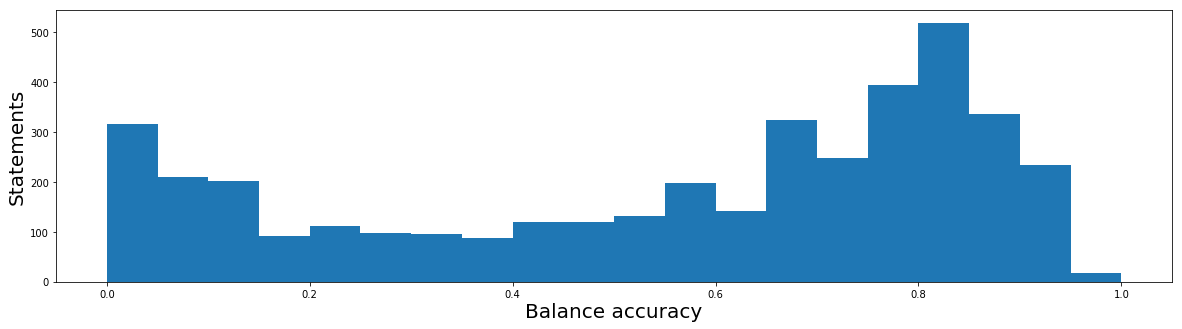

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = result#data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJIAAAFHCAYAAAD6JmYkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAHOxJREFUeJzt3Xu0pWddH/DvLxkIuTADiM6YBBMgUFQMCA2yhNIRkJsItmgVVCSuKqtVQIsWse3KLJe3ZZetSMQajKkokYpxlWjFJFwGGyFibgQlXFQSEZyhMRBuIYTw6x9nJxyGzJxnzsw+79n7fD5rnZW93/Nefk/e8+7Ld57neau7AwAAAABrOWbqAgAAAABYDIIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhsw1SKqq86tqf1Vdt2rZL1XV9VV1bVVdVFXb51kDAAAAAEfHvHskXZDkqQcsuzTJ13f3I5N8IMnL51wDAAAAAEfBXIOk7r48yccOWPam7v7C7OkVSU6dZw0AAAAAHB1Tz5H0g0neOHENAAAAAAyYLEiqqv+U5PbuvnCqGgAAAAAYt22Kg1bVC5I8I8kT11ivN6QgAAAAgC2ku2s9221EkFSzn5UnVU9L8pNJntDdt621cbcsCTbanj17smfPnqnLgC3HtQfTcf3BNFx7MI2qdWVISeY8tK2qLkzy9iQPraq/r6qzk7wyyUlJLquqq6vqVfOsAQAAAICjY649krr7eXez+IJ5HhMAAACA+Zj6rm3AJrR79+6pS4AtybUH03H9wTRce7B4ajPPQVRVvZnrAwAAAFg0VbXuybb1SAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGCIIAkAAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGDItqkLAAAAYGvatev07N9/49RlzM3Onadl374bpi4Djqrq7qlrOKiq6s1cHwAAAOtXVUmW+TtfxXdaNqOqSnfXerY1tA0AAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGCIIAkAAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhcw2Squr8qtpfVdetWnbfqrq0qt5XVZdU1Y551gAAAADA0THvHkkXJHnqAct+KsmbuvufJXlLkpfPuQYAAAAAjoK5BkndfXmSjx2w+NlJfnv2+LeTfMc8awAAAADg6JhijqSv6u79SdLd+5J81QQ1AAAAAHCYtk1dQJI+1C/37Nlz1+Pdu3dn9+7dcy4HAAAAYHns3bs3e/fuPSr7qu5D5jhHfoCq05L8UXefOXt+fZLd3b2/qnYleWt3f+1Btu151wcAAMA0qipr9C1YcBXfadmMqirdXevZdiOGttXs504XJ3nB7PEPJHnDBtQAAAAAwBGaa4+kqrowye4kX5Fkf5JzkvzvJK9P8oAkNyb5N9398YNsr0cSAADAktIjCaZxJD2S5j607UgIkgAAAJaXIAmmsdmHtgEAAACwBARJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBk29QFAAAAAItl167Ts3//jVOXMTc7d56WfftumLqMTam6e+oaDqqqejPXBwAAwPpVVZJl/s5XWdbvtM7dYquqdHetZ1tD2wAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGCIIAkAAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhkwWJFXVj1fVX1XVdVX12qq651S1AAAAALC2SYKkqjo5yYuSPKq7z0yyLcn3TFELAAAAAGO2TXjsY5OcWFVfSHJCko9MWAsAAAAAa5ikR1J3fyTJLyf5+yQfTvLx7n7TFLUAAAAAMGaqoW33SfLsJKclOTnJSVX1vClqAQAAAGDMVEPbnpzk77r75iSpqj9M8s1JLjxwxT179tz1ePfu3dm9e/fGVAgAwF127To9+/ffOHUZc7Nz52nZt++GqctgHfxtAqxt79692bt371HZV3X3UdnRYR206jFJzk9yVpLbklyQ5C+7+9cOWK+nqA8AgC9VVUmW+XNZxefOxeRvc7E5f4vLuVtsVZXurvVsO9UcSe9M8gdJrknyriSV5LwpagEAAABgzCQ9kkbpkQQAsDn4l2c2K3+bi835W1zO3WJbuB5JAAAAACweQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwZChIqqpfqqrtVXWPqnpzVf2/qvq+eRcHAAAAwOYx2iPpKd39iSTPTHJDkjOS/OS8igIAAABg8xkNku4x+++3JXl9d98yp3oAAAAA2KS2Da73R1X13iS3Jvl3VfWVST47v7K2hl27Ts/+/TdOXcbc7Nx5Wvbtu2HqMgDYJLzvwTSW/dpbfselqqYuAuAu1d1rr1R1XJITk9zS3XdU1YlJTuru/XMtrqpH6ltUK28Iy9u+pLLM5w+Aw+N9b7E5f4trK5w77Vtky98+ry2LannPXbJy/rp7XSn16NC2d3T3zd19R5J096eTvHE9BwQAAABgMR1yaFtV7UpySpLjq+obsxIXJ8n2JCfMuTYAAAAANpG15kh6apIXJDk1yX9btfyTSX56TjUBAAAAsAmNzpH0nO6+aAPqOfC45khaaMs9phSAw+N9b7E5f4trK5w77Vtky98+ry2LannPXXJkcyQdzmTbz0lyelb1Yurun1nPQUcJkhbdcl94ABwe73uLzflbXFvh3GnfIlv+9nltWVTLe+6SIwuS1hradqc3JLklyVVJblvPgQAAAABYbKNB0qnd/bS5VgIAAADApnbM4Hpvr6pvmGslAAAAAGxqo3MkvSfJGUk+mJWhbZWku/vMuRZnjqQFt9xjSgE4PN73Fpvzt7i2wrnTvkW2/O3z2rKolvfcJRszR9LT17NzAAAAAJbH0NC27r4xyQOSPHH2+DOj2wIAAACwHIbCoKo6J8nLkrx8tugeSX53XkUBAAAAsPmM9ir6V0meleTTSdLdH0ly73kVBQAAAMDmMxokfW4263UnSVWdOL+SAAAAANiMRoOk36+q30hyn6r6oSRvSvLq+ZUFAAAAwGZTo7ezq6pvTfKUrNyf8ZLuvmyehc2O2ct+uz23SwRgq/C+t9icv8W1Fc6d9i2y5W+f15ZFtbznLlk5f91d69r2cP7HVNX2JNvufN7dN6/noIdxPEHSQlvuCw+Aw+N9b7E5f4trK5w77Vtky98+ry2LannPXXJkQdLoXdteWFX7klyX5MokV83+u25VtaOqXl9V11fVX1fVNx3J/gAAAACYr21rr5Ik+YkkD+/um47isV+R5E+6+7uqaluSE47ivgEAAAA4ykaDpL9N8pmjddDZELl/0d0vSJLu/nySTxyt/QMAAABw9I0GSS9P8vaq+oskt925sLtfvM7jPjDJTVV1QZJHZGWY3Eu6+9YDV7zqqqvWeYjN7bjjjpu6BAAAAIDDMhok/UaStyR5d5IvHKXjPirJj3T3lVX1K0l+Ksk5B674uMc984sbbbt3tm2791E4/PRuvfX9U5cAAAAAbAF79+7N3r17j8q+hu7aVlXXdPc3HpUjruxvZ5J3dPeDZs8fn+Rl3f3tB6zXyzoL/I4du3PLLW/LsrZvxXLPcg/A4XF3l8Xm/C2urXDutG+RLX/7vLYsquU9d8kG3LUtyRur6oer6qur6n53/qzngEnS3fuTfKiqHjpb9KQk71nv/gAAAACYv9Ghbc+d/fflq5Z1kgcdwbFfnOS1VXWPJH+X5Owj2BcAAAAAczYUJHX3A4/2gbv7XUnOOtr7BQAAAGA+hoa2VdUJVfWfq+q82fOHVNUz19oOAAAAgOUxOkfSBUk+l+SbZ88/nORn51IRAAAAAJvSaJD04O7+pSS3J0l3fyYr0+sDAAAAsEWMBkmfq6rjM7u3X1U9OMltc6sKAAAAgE1n9K5te5L8aZIHVNVrkzwu7rIGAAAAsKWM3rXt0qq6KsljszKk7SXdfdNcKwMAAABgUxm9a9ubu/ufuvv/dPcfd/dNVfXmeRcHAAAAwOZxyB5JVXWvJCckuX9V3TdfnGB7e5JT5lwbAAAAAJvIWkPbXpjkx5KcnOSqfDFI+kSSc+dYFwAAAACbzCGDpO5+RZJXVNWLuvuVG1QTAAAAAJvQ6GTbr6yqhyf5uiT3WrX8NfMqDAAAAIDNZShIqqpzkuzOSpD0J0menuTyJIIkAAAAgC1i6K5tSb4zyZOS7Ovus5M8IsmOuVUFAAAAwKYzGiTd2t1fSPL5qtqe5KNJHjC/sgAAAADYbIaGtiW5sqruk+TVWbl726eSvGNuVQEAAACw6VR3H94GVacn2d7d182joAOO1cnh1bcoduzYnVtueVuWtX0rKof79wXA8qqqeN9bXM7f4toK5077Ftnyt89ry6Ja3nOXrJy/7q71bDs0tK2q3nzn4+6+obuvW70MAAAAgOV3yKFtVXWvJCckuX9V3TcrcXGSbE9yypxrAwAAAGATWWuOpBcm+bEkJ2dlbqQ7fTLJufMqCgAAAIDNZ60g6e1Jfj/Jd3b3K6vqB5I8J8kNSS6cc23ARHbtOj379984dRlzs3Pnadm374apywAAYOkdN5tLCJbHISfbrqqrkzy5u2+uqickeV2SFyV5ZJKv7e7vnGtxJttecMs9OdkyM3EeMA9eWxab87e4tsK5075Fpn2La5nblizz+0JyZJNtr9Uj6djuvnn2+LuTnNfdFyW5qKquXc8BAQAAAFhMa9217diqujNselKSt6z63VohFAAAAABLZK0w6PeSvK2qbkpya5L/myRVdUaSW+ZcGwAAAACbyCGDpO7+uap6c5KvTnJpf3GA4DFZmSsJAAAAgC1izeFp3X3F3Sx7/3zKAQAAAGCzWmuOJAAAAABIIkgCAAAAYJAgCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGCIIAkAAACAIZMGSVV1TFVdXVUXT1kHAAAAAGubukfSS5K8Z+IaAAAAABgwWZBUVacmeUaS35yqBgAAAADGTdkj6b8n+ckkPWENAAAAAAyaJEiqqm9Lsr+7r01Ssx8AAAAANrFtEx33cUmeVVXPSHJ8kntX1Wu6+/lfvuqeVY93z34AOJhdu07P/v03Tl3G3OzceVr27bth6jKApXNcqvzbJgDLae/evdm7d+9R2Vd1TzuyrKr+ZZKXdvez7uZ3vawj33bs2J1bbnlblrV9KypT/32xPisfpJf53C3336bzx2blb3OxbYXzt7ztW+a2Jdq36LRvcS1z25Kt8L7e3ev6F5Sp79oGAAAAwIKYamjbXbr7bUneNnUdAAAAAByaHkkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMCQbVMXwDI7LlU1dRFzsXPnadm374apy4AtymsLAABMRZDEHN2WpKcuYi7271/OL7GwGLy2AADAVAxtAwAAAGCIIAkAAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYIggCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJAAAAACGCJIAAAAAGCJIAgAAAGCIIAkAAACAIYIkAAAAAIYIkgAAAAAYIkgCAAAAYMgkQVJVnVpVb6mqv66qd1fVi6eoAwAAAIBx2yY67ueT/IfuvraqTkpyVVVd2t3vnageAAAAANYwSY+k7t7X3dfOHn8qyfVJTpmiFgAAAADGTD5HUlWdnuSRSf5i2koAAAAAOJSphrYlSWbD2v4gyUtmPZPuxp5Vj3fPfmBqx6Wqpi4CAACAufCd72AmC5KqaltWQqTf6e43HHzNPRtUERyO25L01EXMkRdMAABgK/Od72CmHNr2W0ne092vmLAGAAAAAAZNEiRV1eOSfG+SJ1bVNVV1dVU9bYpaAAAAABgzydC27v7zJMdOcWwAAAAA1mfyu7YBAAAAsBgESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwZNvUBQBsvONSVVMXASwdry0AwPITJAFb0G1Jeuoi5sgXWZiG1xYAYPkZ2gYAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMESQBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABDBEkAAAAADBEkAQAAADBEkAQAAADAEEESAAAAAEMESQAAAAAMESQBAAAAMGSyIKmqnlZV762q91fVy6aqAwAAAIAxkwRJVXVMknOTPDXJ1yd5blU9bIpaAAAAABgzVY+kxyT5QHff2N23J3ldkmdPVAsAAAAAA6YKkk5J8qFVz/9htgwAAACATWrb1AWsZfv2b5+6hLn47GffPXUJAAAAAIdlqiDpw0m+ZtXzU2fLvswnPvHHG1LQdGrqAuZsmdu3zG1LtG/Rad+iqlretq3QvsWmfYtrmduWaN+i077FtcxtS5a/fetT3b3xB606Nsn7kjwpyT8meWeS53b39RteDAAAAABDJumR1N13VNWPJrk0K/M0nS9EAgAAANjcJumRBAAAAMDimequbV+iqp5WVe+tqvdX1csOss6vVtUHquraqnrkRtcIy2ita6+qnldV75r9XF5V3zBFnbBsRt73ZuudVVW3V9W/3sj6YFkNfubcXVXXVNVfVdVbN7pGWEYDnzm3V9XFs+96766qF0xQJiydqjq/qvZX1XWHWOews5bJg6SqOibJuUmemuTrkzy3qh52wDpPT/Lg7n5Ikhcm+R8bXigsmZFrL8nfJXlCdz8iyc8mefXGVgnLZ/Dau3O9X0xyycZWCMtp8DPnjiS/luSZ3f3wJN+14YXCkhl83/uRJH/d3Y9M8i1JfrmqNv0dxmEBXJCVa+9urTdrmTxISvKYJB/o7hu7+/Ykr0vy7APWeXaS1yRJd/9Fkh1VtXNjy4Sls+a1191XdPcts6dXJDllg2uEZTTyvpckL0ryB0k+upHFwRIbufael+Si7v5wknT3TRtcIyyjkWuvk9x79vjeSf6puz+/gTXCUuruy5N87BCrrCtr2QxB0ilJPrTq+T/ky7+sHrjOh+9mHeDwjFx7q/3bJG+ca0WwNax57VXVyUm+o7t/Pe47C0fLyPveQ5Pcr6reWlV/WVXfv2HVwfIaufbOTfJ1VfWRJO9K8pINqg22unVlLboLAmuqqm9JcnaSx09dC2wRv5Jk9RwSwiTYGNuSPCrJE5OcmOQdVfWO7v6bacuCpffUJNd09xOr6sFJLquqM7v7U1MXBny5zRAkfTjJ16x6fups2YHrPGCNdYDDM3LtparOTHJekqd196G6RQJjRq69f57kdVVVSe6f5OlVdXt3X7xBNcIyGrn2/iHJTd392SSfrao/S/KIJIIkWL+Ra+/sJL+QJN39t1X1wSQPS3LlhlQIW9e6spbNMLTtL5OcUVWnVdU9k3xPkgM/KF+c5PlJUlWPTfLx7t6/sWXC0lnz2quqr0lyUZLv7+6/naBGWEZrXnvd/aDZzwOzMk/SvxciwREb+cz5hiSPr6pjq+qEJN+U5PoNrhOWzci1d2OSJyfJbH6Wh2blpi/AkascvHf7urKWyXskdfcdVfWjSS7NSrB1fndfX1UvXPl1n9fdf1JVz6iqv0ny6awk1sARGLn2kvyXJPdL8qpZz4jbu/sx01UNi2/w2vuSTTa8SFhCg58531tVlyS5LskdSc7r7vdMWDYsvMH3vZ9N8j9X3aL8P3b3zROVDEujqi5MsjvJV1TV3yc5J8k9c4RZS3X7fAoAAADA2jbD0DYAAAAAFoAgCQAAAIAhgiQAAAAAhgiSAAAAABgiSAIAAABgiCAJAAAAgCGCJABg06qqO6rq6qq6tqqurKrHDmzzyY2oDQBgK9o2dQEAAIfw6e5+VJJU1VOS/GKS3Wts0/MuakpVdWx33zF1HQDA1qRHEgCwmdWqxzuS3JwkVXViVb1p1kvpXVX1rC/b8CDrVNVpVfWeqjqvqv6qqv60qo6b/e7BVXXZqh5QD5wt/4mqeuds+Tl3W2jVq2brvHv1OlV1VlX9+WzbK2Z1HVNV/3W27rVV9SOzdT9YVfebPX50Vb119vicqnpNVV2e5DWzNvzZrMYv6alVVS+rquuq6pqq+vmqelBVXbXq92esfg4AcDj0SAIANrPjq+rqJMcn2ZXkibPltyb5ju7+VFV9RZIrklx8wLafPcQ6ZyT57u7+4ar6X0mek+TCJK9N8vPdfXFV3TPJMVX1rUke0t2PqapKcnFVPb67Lz/geD/d3R+vqmOSvLmqLkryviSvS/Jd3X11VZ00q+uHk5yW5Mzu7qq6z2wfB/amWv38a5M8rrs/V1X3SvLk2eMzkvxekrOq6ulJvj3JWd19W1XdZ1bTx6vqzO6+LsnZSX5r7f/1AABfTpAEAGxmn1k1tO2xSX4nycOz0qv6F6rqCUm+kOTkqvqq7v7oqm3r7taZ/e6D3f3u2eOrkpw+C3lO7u6Lk6S7Pzc77lOSfOss0KokJyZ5SJIDg6Tvqaofysrnq11Jvm62/CPdffVsn5+a7fPJSX69u3u2/OOraj6Yi++sKck9k5xbVY9McsesniR5UpILuvu2A/Z7fpKzq+qlSb47yVmHOA4AwEEJkgCAhdDdV1TV/avq/km+Lcn9k3xjd3+hqj6Y5F4HbPK9h1jntlXr3bFq+d0FOZXkF7r71QerrapOT/LSJI/u7k9U1QVr7PNgPp8vTj1wYHs+verxjyfZ191nVtWxWemhdSgXJTknyVuTXNndHzuMmgAA7mKOJABgM7srhKmqh2Xls8s/ZWW+pI/OAqJvycowsQO3GVnnLrPeQh+qqmfPjnfPqjo+ySVJfrCqTpwtP7mqvvKAzbcn+VSST1bVziRPny1/X5JdVfXo2bYnzYKfy5K8cPY4VXXf2fofTPLo2ePnHOL/y44k/zh7/Pwkx84eX5aVnkfHr97vrIfSJUl+PckFh9gvAMAhCZIAgM3sXlV1dVVdk5V5gJ4/Gw722qzMCfSuJN+X5PpV29w5r9DIOgd6fpIXz7b58yQ7u/uyrMyf9I6qui7J65OctHqj2dxD186O8buZDXvr7tuzMpTs3Kq6NsmlSY5L8ptJPpTkulnbnjvb1c8k+dWqemdWeicdzKuSvGC27UMz663U3ZdkZR6oK2dD8V66apvXZqX31aWH2C8AwCHVbGg+AABLbDY/0vbuvtu7zgEAjDBHEgDAkquqP0zyoHzxrncAAOuiRxIAAAAAQ8yRBAAAAMAQQRIAAAAAQwRJAAAAAAwRJAEAAAAwRJAEAAAAwBBBEgAAAABD/j//WowQ0oxSqgAAAABJRU5ErkJggg==np.random.normal(size = 1000)
plt.figure(figsize=(20,5))
plt.hist(x, bins=20)
#plt.title('Balance accuracy of sample statements')
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
plt.xlabel('Balance accuracy',fontsize=20)
plt.ylabel('Statements',fontsize=20)

### Read the xml and output using pandas

Command to generate boxes from tesseract

command = 'tesseract ./TestRandomExamples/testText.jpg ./TestRandomExamples/testText  batch.nochop makebox'

### Connect to blob storage

In [7]:
blob_dal = AzureBlobStorageDataAccessLayer('devcapitecdata', 'Gt5z0EAAAm5ZETk//WBnRiQUZ9FDB/BmLmbx5ZPRtDwh6vxTDAB/XzLlM+m/epfnDYcZ8JDfMEGg1p9tBW0iFQ==', 'bank-statements', home_directory='drop/Documentum_line_files')

blob_dal.connect()
files = blob_dal.list(path='CI')

print ("Number of files: ", len(files))


Number of files:  8000


In [8]:

print(files[500].name)
print(files[501].name)


0f427a33-cbed-4673-a5d0-79dce1b8d45b.pdf
0f427a33-cbed-4673-a5d0-79dce1b8d45b_POCSTATEMENTSSTD_Capitec__19122017_022834_1154.xml


### Pdf viewer

In [11]:
import commands
import time
import glob
pdfFolderDir = "./view_pdf&xml$txt/"
exampleNumber = 999

import commands
import time

count = 0
for fileNum in range(len(files)):
    if files[fileNum].name[-3:]=="pdf":
        count += 1
        if count == exampleNumber:
            pdfName = files[fileNum].directory + files[fileNum].name
            print("Working on file number: "+str(count))
            # Download the pdf file
            start = time.time()
            matchString = files[fileNum].name[:-4]
            stream = StringIO()
            blob_dal.get(pdfName, stream)
            pdfDir = pdfFolderDir+"Example.pdf"
            with open (pdfDir, 'w') as tmp:
              stream.seek (0)
              shutil.copyfileobj (stream, tmp)
            print("It took ",round(time.time()-start,2)," seconds download the pdf.")
            break
print("Done")

Working on file number: 999
It took  0.39  seconds download the pdf.
Done
